<a href="https://colab.research.google.com/github/Ramakrishna0707/Tutorials/blob/main/pyspark_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

PySpark is a Spark library written in Python to run Python applications using Apache Spark capabilities, using PySpark we can run applications parallelly on the distributed cluster (multiple nodes).

In other words, PySpark is a Python API for Apache Spark. Apache Spark is an analytical processing engine for large scale powerful distributed data processing and machine learning applications.

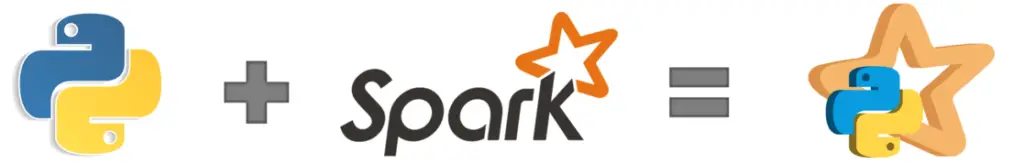

**Features**
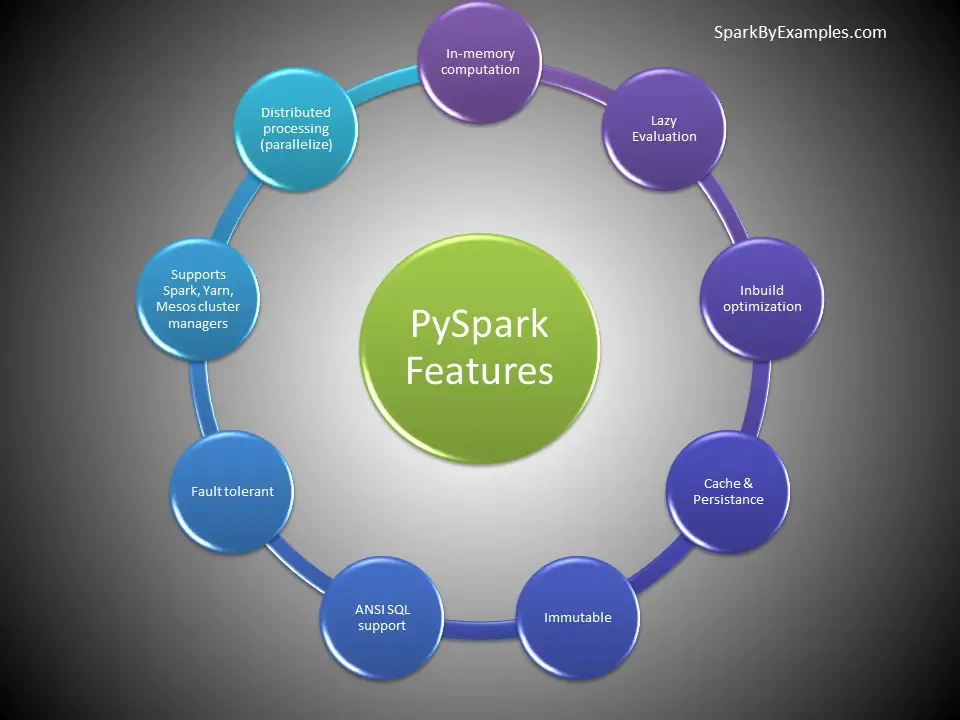

**Advantages of PySpark**

1.PySpark is a general-purpose, in-memory, distributed processing engine that allows you to process data efficiently in a distributed fashion.
2.Applications running on PySpark are 100x faster than traditional systems.
You will get great benefits using PySpark for data ingestion pipelines.
3.Using PySpark we can process data from Hadoop HDFS, AWS S3, and many file systems.
4.PySpark also is used to process real-time data using Streaming and Kafka.
Using PySpark streaming you can also stream files from the file system and also stream from the socket.
5.PySpark natively has machine learning and graph libraries.

**PySpark Modules & Packages**
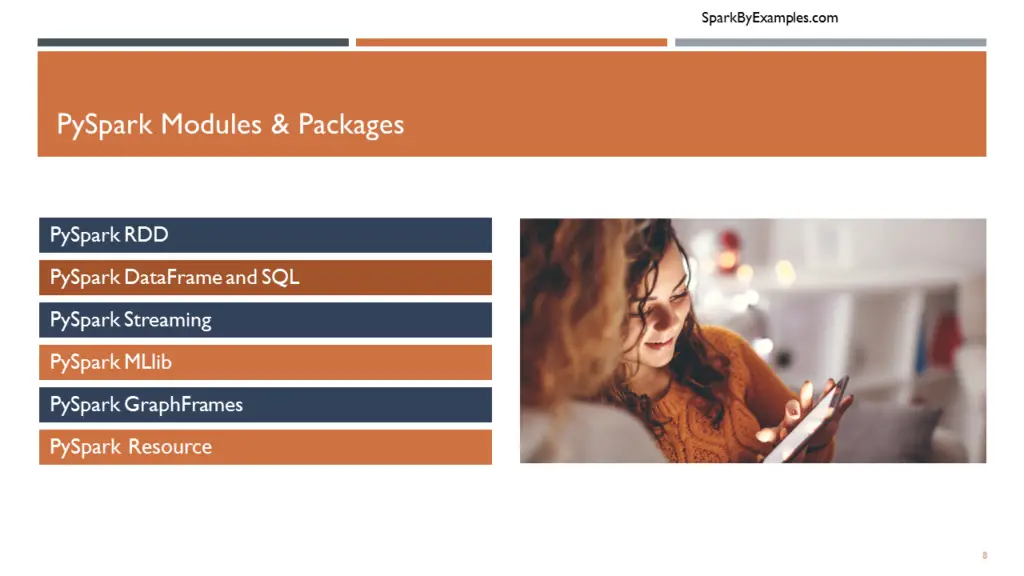

**Spark session internally creates a sparkContext variable of SparkContext. You can create multiple SparkSession objects but only one SparkContext per JVM. In case if you want to create another new SparkContext you should stop existing Sparkcontext (using stop()) before creating a new one.**

In [ ]:
pip install pyspark  #installation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=c3fd8159ff0cde1a1dfe945174497d279a161e4b2c0dacd6059cb9dbdef667b5
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create SparkSession 
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .getOrCreate() 

**using parallelize()**

SparkContext has several functions to use with RDDs. For example, it’s parallelize() method is used to create an RDD from a list.

In [ ]:
# Create RDD from parallelize    
dataList = [("Java", 20000), ("Python", 100000), ("Scala", 3000)]
rdd=spark.sparkContext.parallelize(dataList)

In [ ]:
dataList

[('Java', 20000), ('Python', 100000), ('Scala', 3000)]

In [ ]:
type(dataList)

list

In [ ]:
type(rdd)

pyspark.rdd.RDD

**using textFile()**

RDD can also be created from a text file using textFile() function of the SparkContext.


**Create RDD from external Data source**

**rdd2 = spark.sparkContext.textFile("/path/test.txt")**


**RDD Operations**

On PySpark RDD, you can perform two kinds of operations.

**RDD transformations** – Transformations are lazy operations. When you run a transformation(for example update), instead of updating a current RDD, these operations return another RDD.

**RDD actions** – operations that trigger computation and return RDD values to the driver.

**RDD Transformations**
Transformations on Spark RDD returns another RDD and transformations are lazy meaning they don’t execute until you call an action on RDD. Some transformations on RDD’s are flatMap(), map(), reduceByKey(), filter(), sortByKey() and return new RDD instead of updating the current.

**RDD Actions**
RDD Action operation returns the values from an RDD to a driver node. In other words, any RDD function that returns non RDD[T] is considered as an action. 
Some actions on RDDs are count(), collect(), first(), max(), reduce() and more.

**PySpark DataFrame**

DataFrame is a distributed collection of data organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood. DataFrames can be constructed from a wide array of sources such as structured data files, tables in Hive, external databases, or existing RDDs.

**Is PySpark faster than pandas?**

Due to parallel execution on all cores on multiple machines, PySpark runs operations faster then pandas. In other words, pandas DataFrames run operations on a single node whereas PySpark runs on multiple machines. To know more read at pandas DataFrame vs PySpark Differences with Examples.

**DataFrame creation**

The simplest way to create a DataFrame is from a Python list of data. DataFrame can also be created from an RDD and by reading files from several sources.

**using createDataFrame()**

By using createDataFrame() function of the SparkSession you can create a DataFrame.

In [ ]:

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)


In [ ]:
df.show()   # shows the 20 elements from the DataFrame.



+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



In [ ]:
df.printSchema()#we can get the schema of the DataFrame using 

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



**DataFrame operations**

Like RDD, DataFrame also has operations like Transformations and Actions.

**DataFrame from external data sources**

In real-time applications, DataFrames are created from external sources like files from the local system, HDFS, S3 Azure, HBase, MySQL table e.t.c. Below is an example of how to read a CSV file from a local system.

In [ ]:
pip install gdown   #gdown supports direct download of big files from google drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1UBoiIGhfg-Yxk9wXbc48Lx9Z9ZzWg_4Z


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UBoiIGhfg-Yxk9wXbc48Lx9Z9ZzWg_4Z
To: /content/chess_wc_history_game_info.csv
100% 596k/596k [00:00<00:00, 79.9MB/s]


In [ ]:

df1 = spark.read.csv("/content/chess_wc_history_game_info.csv")
df1.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)



**Supported file formats**

DataFrame has a rich set of API which supports reading and writing several file formats

csv

text

Avro

Parquet

tsv

xml and many more

In order to use SQL, first, create a temporary table on DataFrame using createOrReplaceTempView() function. Once created, this table can be accessed throughout the SparkSession using sql() and it will be dropped along with your SparkContext termination.

In [ ]:
#Use sql() method of the SparkSession object to run the query and this method returns a new DataFrame.

In [ ]:

df.createOrReplaceTempView("PERSON_DATA")
df2 = spark.sql("SELECT * from PERSON_DATA")
df2.printSchema()
df2.show()


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



In [ ]:

groupDF = spark.sql("SELECT gender, count(*) from PERSON_DATA group by gender")
groupDF.show()


+------+--------+
|gender|count(1)|
+------+--------+
|     F|       2|
|     M|       3|
+------+--------+



**PySpark Streaming Tutorial**

PySpark Streaming is a scalable, high-throughput, fault-tolerant streaming processing system that supports both batch and streaming workloads. It is used to process real-time data from sources like file system folder, TCP socket, S3, Kafka, Flume, Twitter, and Amazon Kinesis to name a few. The processed data can be pushed to databases, Kafka, live dashboards e.t.c


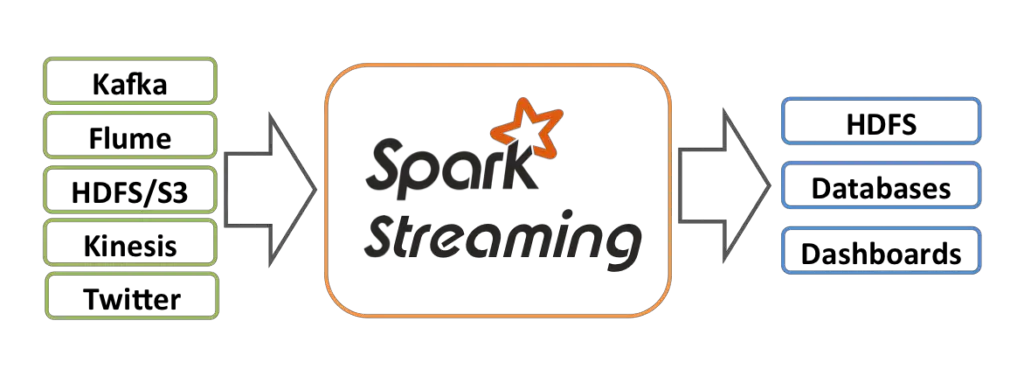

**Streaming from TCP Socket**

Use readStream.format("socket") from Spark session object to read data from the socket and provide options host and port where you want to stream data from.

In [ ]:

df3 = spark.readStream \
      .format("socket")\
      .option("host","localhost")\
      .option("port","9090")\
      .load()


In [ ]:
df3.printSchema()

root
 |-- value: string (nullable = true)



In [ ]:
#After processing, you can stream the DataFrame to console. In real-time, we ideally stream it to either Kafka, database e.t.c

**Streaming from Kafka**

Using Spark Streaming we can read from Kafka topic and write to Kafka topic in TEXT, CSV, AVRO and JSON formats



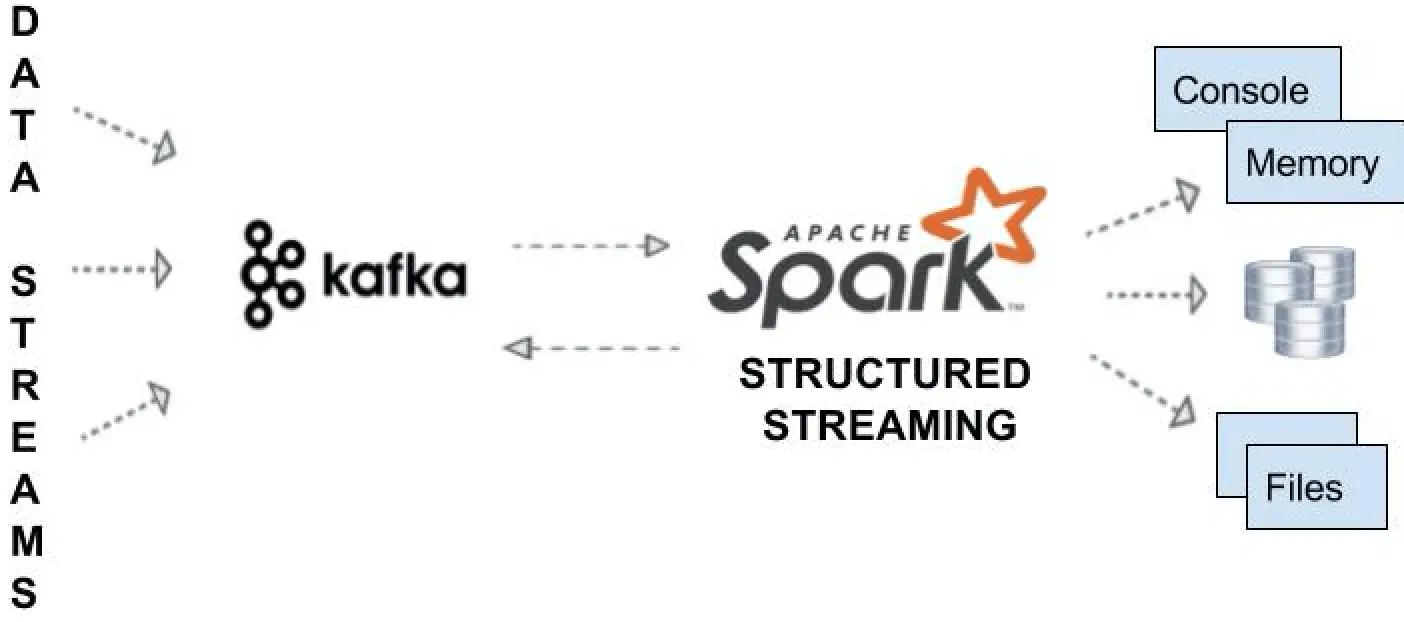

**Create SparkSession**

In order to create SparkSession programmatically (in .py file) in PySpark, you need to use the builder pattern method builder() as explained below. getOrCreate() method returns an already existing SparkSession; if not exists, it creates a new SparkSession.



In [ ]:

# Create SparkSession from builder
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()


master() – If you are running it on the cluster you need to use your master name as an argument to master(). usually, it would be either yarn or mesos depends on your cluster setup.

Use local[x] when running in Standalone mode. x should be an integer value and should be greater than 0; this represents how many partitions it should create when using RDD, DataFrame, and Dataset. Ideally, x value should be the number of CPU cores you have.
appName() – Used to set your application name.

getOrCreate() – This returns a SparkSession object if already exists, and creates a new one if not exist.

Note:  SparkSession object spark is by default available in the PySpark shell.

 **Create Another SparkSession**
 
You can also create a new SparkSession using newSession() method. This uses the same app name, master as the existing session. Underlying SparkContext will be the same for both sessions as you can have only one context per PySpark application.

In [ ]:

# Create new SparkSession
spark2 = SparkSession.newSession
print(spark2)


<function SparkSession.newSession at 0x7facdc5493a0>


**Get Existing SparkSession**

You can get the existing SparkSession in PySpark using the builder.getOrCreate(), for example.

In [ ]:

# Get Existing SparkSession
spark3 = SparkSession.builder.getOrCreate
print(spark3)


<bound method SparkSession.Builder.getOrCreate of <pyspark.sql.session.SparkSession.Builder object at 0x7facdc656e20>>


**Using Spark Config**

If you wanted to set some configs to SparkSession, use the config() method.



In [ ]:

# Usage of config()
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .config("spark.some.config.option", "config-value") \
      .getOrCreate()


**Create SparkSession with Hive Enable**

In order to use Hive with PySpark, you need to enable it using the enableHiveSupport() method.



In [ ]:

# Enabling Hive to use in Spark
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .config("spark.sql.warehouse.dir", "<path>/spark-warehouse") \
      .enableHiveSupport() \
      .getOrCreate()


 **Using PySpark Configs**
 
Once the SparkSession is created, you can add the spark configs during runtime or get all configs.



**Create PySpark DataFrame**

SparkSession also provides several methods to create a Spark DataFrame and DataSet. The below example uses the createDataFrame() method which takes a list of data.

In [ ]:

# Create DataFrame
df = spark.createDataFrame(
    [("Scala", 25000), ("Spark", 35000), ("PHP", 21000)])
df.show()




+-----+-----+
|   _1|   _2|
+-----+-----+
|Scala|25000|
|Spark|35000|
|  PHP|21000|
+-----+-----+



🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢

**PySpark – DataFrame**

---



**1. Create Empty RDD in PySpark**

Create an empty RDD by using emptyRDD() of SparkContext for example spark.sparkContext.emptyRDD().

In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

#Creates Empty RDD
emptyRDD = spark.sparkContext.emptyRDD()
print(emptyRDD)

#Diplays
#EmptyRDD[188] at emptyRDD


EmptyRDD[32] at emptyRDD at NativeMethodAccessorImpl.java:0


Alternatively you can also get empty RDD by using 

**spark.sparkContext.parallelize([])**.



In [ ]:

#Creates Empty RDD using parallelize
rdd2= spark.sparkContext.parallelize([])
print(rdd2)

#EmptyRDD[205] at emptyRDD at NativeMethodAccessorImpl.java:0
#ParallelCollectionRDD[206] at readRDDFromFile at PythonRDD.scala:262


ParallelCollectionRDD[33] at readRDDFromFile at PythonRDD.scala:274


**2. Create Empty DataFrame with Schema (StructType)**

In order to create an empty PySpark DataFrame manually with schema ( column names & data types) first, Create a schema using StructType and StructField .



In [ ]:

#Create Schema
from pyspark.sql.types import StructType,StructField, StringType
schema = StructType([
  StructField('firstname', StringType(), True),
  StructField('middlename', StringType(), True),
  StructField('lastname', StringType(), True)
  ])


Now use the empty RDD created above and pass it to createDataFrame() of SparkSession along with the schema for column names & data types.

In [ ]:

#Create empty DataFrame from empty RDD
df = spark.createDataFrame(emptyRDD,schema)
df.printSchema()


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)



**3. Convert Empty RDD to DataFrame**

You can also create empty DataFrame by converting empty RDD to DataFrame using toDF().

In [ ]:

#Convert empty RDD to Dataframe
df1 = emptyRDD.toDF(schema)
df1.printSchema()


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)



**5. Create Empty DataFrame without Schema (no columns)**

To create empty DataFrame with out schema (no columns) just create a empty schema and use it while creating PySpark DataFrame.



In [ ]:

#Create empty DatFrame with no schema (no columns)
df3 = spark.createDataFrame([], StructType([]))
df3.printSchema()

#print below empty schema
#root


root



🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢

**Convert PySpark RDD to DataFrame**

**1. Create PySpark RDD**

First, let’s create an RDD by passing Python list object to sparkContext.parallelize() function.

In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
dept = [("Finance",10),("Marketing",20),("Sales",30),("IT",40)]
rdd = spark.sparkContext.parallelize(dept)


**2. Convert PySpark RDD to DataFrame**

Converting PySpark RDD to DataFrame can be done using toDF(), createDataFrame(). In this section, I will explain these two methods.

2.1 Using rdd.toDF() function
PySpark provides toDF() function in RDD which can be used to convert RDD into Dataframe



In [ ]:

df = rdd.toDF()
df.printSchema()
df.show(truncate=False)


root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)

+---------+---+
|_1       |_2 |
+---------+---+
|Finance  |10 |
|Marketing|20 |
|Sales    |30 |
|IT       |40 |
+---------+---+



toDF() has another signature that takes arguments to define column names as shown below.



In [ ]:

deptColumns = ["dept_name","dept_id"]
df2 = rdd.toDF(deptColumns)
df2.printSchema()
df2.show(truncate=False)


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



2.2 Using PySpark createDataFrame() function
SparkSession class provides createDataFrame() method to create DataFrame and it takes rdd object as an argument.



In [ ]:

deptDF = spark.createDataFrame(rdd, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [ ]:
type(rdd)

pyspark.rdd.RDD

In [ ]:
type(deptDF)

pyspark.sql.dataframe.DataFrame

2.3 Using createDataFrame() with StructType schema
When you infer the schema, by default the datatype of the columns is derived from the data and set’s nullable to true for all columns. We can change this behavior by supplying schema using StructType – where we can specify a column name, data type and nullable for each field/column.

If you wanted to know more about StructType, please go through how to use StructType and StructField to define the custom schema.

In [ ]:

from pyspark.sql.types import StructType,StructField, StringType
deptSchema = StructType([       
    StructField('dept_name', StringType(), True),
    StructField('dept_id', StringType(), True)
])

deptDF1 = spark.createDataFrame(rdd, schema = deptSchema)
deptDF1.printSchema()
deptDF1.show(truncate=False)


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: string (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [ ]:
#3. Complete Example

In [ ]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

dept = [("Finance",10),("Marketing",20),("Sales",30),("IT",40)]
rdd = spark.sparkContext.parallelize(dept)

df = rdd.toDF()
df.printSchema()
df.show(truncate=False)

deptColumns = ["dept_name","dept_id"]
df2 = rdd.toDF(deptColumns)
df2.printSchema()
df2.show(truncate=False)

deptDF = spark.createDataFrame(rdd, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)

from pyspark.sql.types import StructType,StructField, StringType
deptSchema = StructType([       
    StructField('dept_name', StringType(), True),
    StructField('dept_id', StringType(), True)
])

deptDF1 = spark.createDataFrame(rdd, schema = deptSchema)
deptDF1.printSchema()
deptDF1.show(truncate=False)


root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)

+---------+---+
|_1       |_2 |
+---------+---+
|Finance  |10 |
|Marketing|20 |
|Sales    |30 |
|IT       |40 |
+---------+---+

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: string (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢

# **Convert PySpark DataFrame to Pandas**


In [ ]:
#Prepare PySpark DataFrame

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James","","Smith","36636","M",60000),
        ("Michael","Rose","","40288","M",70000),
        ("Robert","","Williams","42114","",400000),
        ("Maria","Anne","Jones","39192","F",500000),
        ("Jen","Mary","Brown","","F",0)]

columns = ["first_name","middle_name","last_name","dob","gender","salary"]
pysparkDF = spark.createDataFrame(data = data, schema = columns)
pysparkDF.printSchema()
pysparkDF.show(truncate=False)


root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
|Robert    |           |Williams |42114|      |400000|
|Maria     |Anne       |Jones    |39192|F     |500000|
|Jen       |Mary       |Brown    |     |F     |0     |
+----------+-----------+---------+-----+------+------+



In [ ]:
#Convert PySpark Dataframe to Pandas DataFrame

pandasDF = pysparkDF.toPandas()
print(pandasDF)


  first_name middle_name last_name    dob gender  salary
0      James                 Smith  36636      M   60000
1    Michael        Rose            40288      M   70000
2     Robert              Williams  42114         400000
3      Maria        Anne     Jones  39192      F  500000
4        Jen        Mary     Brown             F       0


In [ ]:

# Nested structure elements
from pyspark.sql.types import StructType, StructField, StringType,IntegerType
dataStruct = [(("James","","Smith"),"36636","M","3000"), \
      (("Michael","Rose",""),"40288","M","4000"), \
      (("Robert","","Williams"),"42114","M","4000"), \
      (("Maria","Anne","Jones"),"39192","F","4000"), \
      (("Jen","Mary","Brown"),"","F","-1") \
]

schemaStruct = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
          StructField('dob', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', StringType(), True)
         ])
df = spark.createDataFrame(data=dataStruct, schema = schemaStruct)
df.printSchema()

pandasDF2 = df.toPandas()
print(pandasDF2)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)

                   name    dob gender salary
0      (James, , Smith)  36636      M   3000
1     (Michael, Rose, )  40288      M   4000
2  (Robert, , Williams)  42114      M   4000
3  (Maria, Anne, Jones)  39192      F   4000
4    (Jen, Mary, Brown)             F     -1


# **PySpark show() – Display DataFrame Contents in Table**

In [ ]:
#1. Quick Example of show()

In [ ]:

# Default - displays 20 rows and 
# 20 charactes from column value 
df.show()

#Display full column contents
df.show(truncate=False)

# Display 2 rows and full column contents
df.show(2,truncate=False) 

# Display 2 rows & column values 25 characters
df.show(2,truncate=25) 

# Display DataFrame rows & columns vertically
df.show(n=3,truncate=25,vertical=True)


+--------------------+-----+------+------+
|                name|  dob|gender|salary|
+--------------------+-----+------+------+
|    {James, , Smith}|36636|     M|  3000|
|   {Michael, Rose, }|40288|     M|  4000|
|{Robert, , Williams}|42114|     M|  4000|
|{Maria, Anne, Jones}|39192|     F|  4000|
|  {Jen, Mary, Brown}|     |     F|    -1|
+--------------------+-----+------+------+

+--------------------+-----+------+------+
|name                |dob  |gender|salary|
+--------------------+-----+------+------+
|{James, , Smith}    |36636|M     |3000  |
|{Michael, Rose, }   |40288|M     |4000  |
|{Robert, , Williams}|42114|M     |4000  |
|{Maria, Anne, Jones}|39192|F     |4000  |
|{Jen, Mary, Brown}  |     |F     |-1    |
+--------------------+-----+------+------+

+-----------------+-----+------+------+
|name             |dob  |gender|salary|
+-----------------+-----+------+------+
|{James, , Smith} |36636|M     |3000  |
|{Michael, Rose, }|40288|M     |4000  |
+-----------------+-----

**2. show() Syntax**

Syntax

def show(self, n=20, truncate=True, vertical=False):


# **PySpark StructType & StructField Explained with Examples**

**1. StructType – Defines the structure of the Dataframe
PySpark provides from pyspark.sql.types import StructType class to define the structure of the DataFrame.

StructType is a collection or list of StructField objects.

PySpark printSchema() method on the DataFrame shows StructType columns as struct.**

In [ ]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])
 
df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



**Defining Nested StructType object struct**


In [ ]:

structureData = [
    (("James","","Smith"),"36636","M",3100),
    (("Michael","Rose",""),"40288","M",4300),
    (("Robert","","Williams"),"42114","M",1400),
    (("Maria","Anne","Jones"),"39192","F",5500),
    (("Jen","Mary","Brown"),"","F",-1)
  ]
structureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('id', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', IntegerType(), True)
         ])

df2 = spark.createDataFrame(data=structureData,schema=structureSchema)
df2.printSchema()
df2.show(truncate=False)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+--------------------+-----+------+------+
|name                |id   |gender|salary|
+--------------------+-----+------+------+
|{James, , Smith}    |36636|M     |3100  |
|{Michael, Rose, }   |40288|M     |4300  |
|{Robert, , Williams}|42114|M     |1400  |
|{Maria, Anne, Jones}|39192|F     |5500  |
|{Jen, Mary, Brown}  |     |F     |-1    |
+--------------------+-----+------+------+



**Adding & Changing struct of the DataFrame**

In [ ]:

from pyspark.sql.functions import col,struct,when
updatedDF = df2.withColumn("OtherInfo", 
    struct(col("id").alias("identifier"),
    col("gender").alias("gender"),
    col("salary").alias("salary"),
    when(col("salary").cast(IntegerType()) < 2000,"Low")
      .when(col("salary").cast(IntegerType()) < 4000,"Medium")
      .otherwise("High").alias("Salary_Grade")
  )).drop("id","gender","salary")

updatedDF.printSchema()
updatedDF.show(truncate=False)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- OtherInfo: struct (nullable = false)
 |    |-- identifier: string (nullable = true)
 |    |-- gender: string (nullable = true)
 |    |-- salary: integer (nullable = true)
 |    |-- Salary_Grade: string (nullable = false)

+--------------------+------------------------+
|name                |OtherInfo               |
+--------------------+------------------------+
|{James, , Smith}    |{36636, M, 3100, Medium}|
|{Michael, Rose, }   |{40288, M, 4300, High}  |
|{Robert, , Williams}|{42114, M, 1400, Low}   |
|{Maria, Anne, Jones}|{39192, F, 5500, High}  |
|{Jen, Mary, Brown}  |{, F, -1, Low}          |
+--------------------+------------------------+



**Using SQL ArrayType and MapType**

SQL StructType also supports ArrayType and MapType to define the DataFrame columns for array and map collections respectively. On the below example, column hobbies defined as ArrayType(StringType) and properties defined as MapType(StringType,StringType) meaning both key and value as String.

**Checking if a Column Exists in a DataFrame**

In [ ]:

#print(df.schema.fieldNames.contains("firstname"))
#print(df.schema.contains(StructField("firstname",StringType,true)))


In [ ]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,ArrayType,MapType
from pyspark.sql.functions import col,struct,when

spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ 
    StructField("firstname",StringType(),True), 
    StructField("middlename",StringType(),True), 
    StructField("lastname",StringType(),True), 
    StructField("id", StringType(), True), 
    StructField("gender", StringType(), True), 
    StructField("salary", IntegerType(), True) 
  ])
 
df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)

structureData = [
    (("James","","Smith"),"36636","M",3100),
    (("Michael","Rose",""),"40288","M",4300),
    (("Robert","","Williams"),"42114","M",1400),
    (("Maria","Anne","Jones"),"39192","F",5500),
    (("Jen","Mary","Brown"),"","F",-1)
  ]
structureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('id', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', IntegerType(), True)
         ])

df2 = spark.createDataFrame(data=structureData,schema=structureSchema)
df2.printSchema()
df2.show(truncate=False)


updatedDF = df2.withColumn("OtherInfo", 
    struct(col("id").alias("identifier"),
    col("gender").alias("gender"),
    col("salary").alias("salary"),
    when(col("salary").cast(IntegerType()) < 2000,"Low")
      .when(col("salary").cast(IntegerType()) < 4000,"Medium")
      .otherwise("High").alias("Salary_Grade")
  )).drop("id","gender","salary")

updatedDF.printSchema()
updatedDF.show(truncate=False)


""" Array & Map"""


arrayStructureSchema = StructType([
    StructField('name', StructType([
       StructField('firstname', StringType(), True),
       StructField('middlename', StringType(), True),
       StructField('lastname', StringType(), True)
       ])),
       StructField('hobbies', ArrayType(StringType()), True),
       StructField('properties', MapType(StringType(),StringType()), True)
    ])


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)



# **PySpark Column Class | Operators & Functions**

pyspark.sql.Column class provides several functions to work with DataFrame to manipulate the Column values, evaluate the boolean expression to filter rows, retrieve a value or part of a value from a DataFrame column, and to work with list, map & struct columns.

In [ ]:

from pyspark.sql.functions import lit
colObj = lit("sparkbyexamples.com")


In [ ]:
data=[("James",23),("Ann",40)]
df=spark.createDataFrame(data).toDF("name.fname","gender")
df.printSchema()

root
 |-- name.fname: string (nullable = true)
 |-- gender: long (nullable = true)



In [ ]:
df.show()

+----------+------+
|name.fname|gender|
+----------+------+
|     James|    23|
|       Ann|    40|
+----------+------+



In [ ]:
df.select(df.gender).show()


+------+
|gender|
+------+
|    23|
|    40|
+------+



In [ ]:

#df["gender"].show()  error = TypeError: 'Column' object is not callable

In [ ]:
df.select(df["gender"]).show()

+------+
|gender|
+------+
|    23|
|    40|
+------+



In [ ]:
#Accessing column name with dot (with backticks)
df.select(df["`name.fname`"]).show()

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
+----------+



In [ ]:

#Using SQL col() function
from pyspark.sql.functions import col
df.select(col("gender")).show()
#Accessing column name with dot (with backticks)
df.select(col("`name.fname`")).show()

+------+
|gender|
+------+
|    23|
|    40|
+------+

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
+----------+



In [ ]:
#Create DataFrame with struct using Row class
from pyspark.sql import Row
data=[Row(name="James",prop=Row(hair="black",eye="blue")),
      Row(name="Ann",prop=Row(hair="grey",eye="black"))]
df=spark.createDataFrame(data)
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- prop: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



In [ ]:
#Access struct column
df.select(df.prop.hair).show()
df.select(df["prop.hair"]).show()
df.select(col("prop.hair")).show()

#Access all columns from struct
df.select(col("prop.*")).show()

+---------+
|prop.hair|
+---------+
|    black|
|     grey|
+---------+

+-----+
| hair|
+-----+
|black|
| grey|
+-----+

+-----+
| hair|
+-----+
|black|
| grey|
+-----+

+-----+-----+
| hair|  eye|
+-----+-----+
|black| blue|
| grey|black|
+-----+-----+



**2. PySpark Column Operators**

In [ ]:

data=[(100,2,1),(200,3,4),(300,4,4)]
df=spark.createDataFrame(data).toDF("col1","col2","col3")

#Arthmetic operations
df.select(df.col1 + df.col2).show()
df.select(df.col1 - df.col2).show() 
df.select(df.col1 * df.col2).show()
df.select(df.col1 / df.col2).show()
df.select(df.col1 % df.col2).show()

df.select(df.col2 > df.col3).show()
df.select(df.col2 < df.col3).show()
df.select(df.col2 == df.col3).show()


+-------------+
|(col1 + col2)|
+-------------+
|          102|
|          203|
|          304|
+-------------+

+-------------+
|(col1 - col2)|
+-------------+
|           98|
|          197|
|          296|
+-------------+

+-------------+
|(col1 * col2)|
+-------------+
|          200|
|          600|
|         1200|
+-------------+

+-----------------+
|    (col1 / col2)|
+-----------------+
|             50.0|
|66.66666666666667|
|             75.0|
+-----------------+

+-------------+
|(col1 % col2)|
+-------------+
|            0|
|            2|
|            0|
+-------------+

+-------------+
|(col2 > col3)|
+-------------+
|         true|
|        false|
|        false|
+-------------+

+-------------+
|(col2 < col3)|
+-------------+
|        false|
|         true|
|        false|
+-------------+

+-------------+
|(col2 = col3)|
+-------------+
|        false|
|        false|
|         true|
+-------------+



**3. PySpark Column Functions**

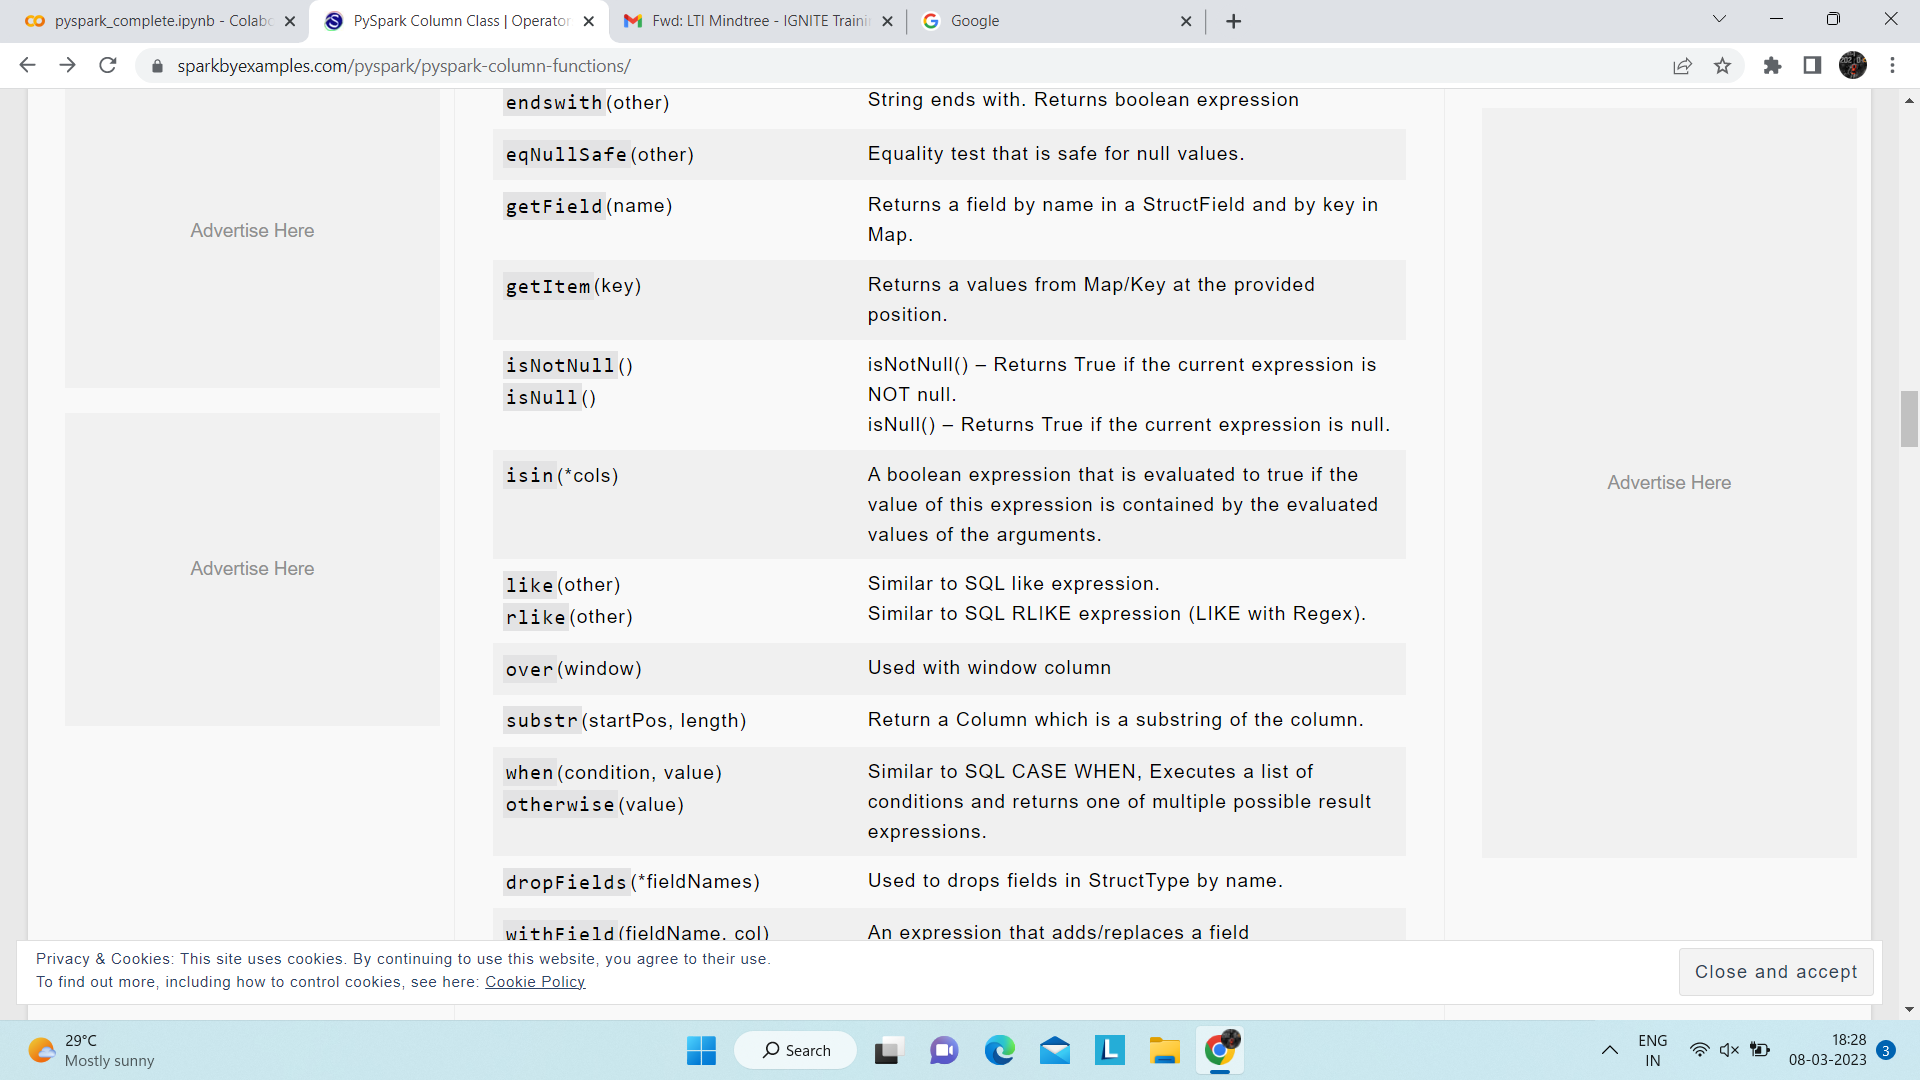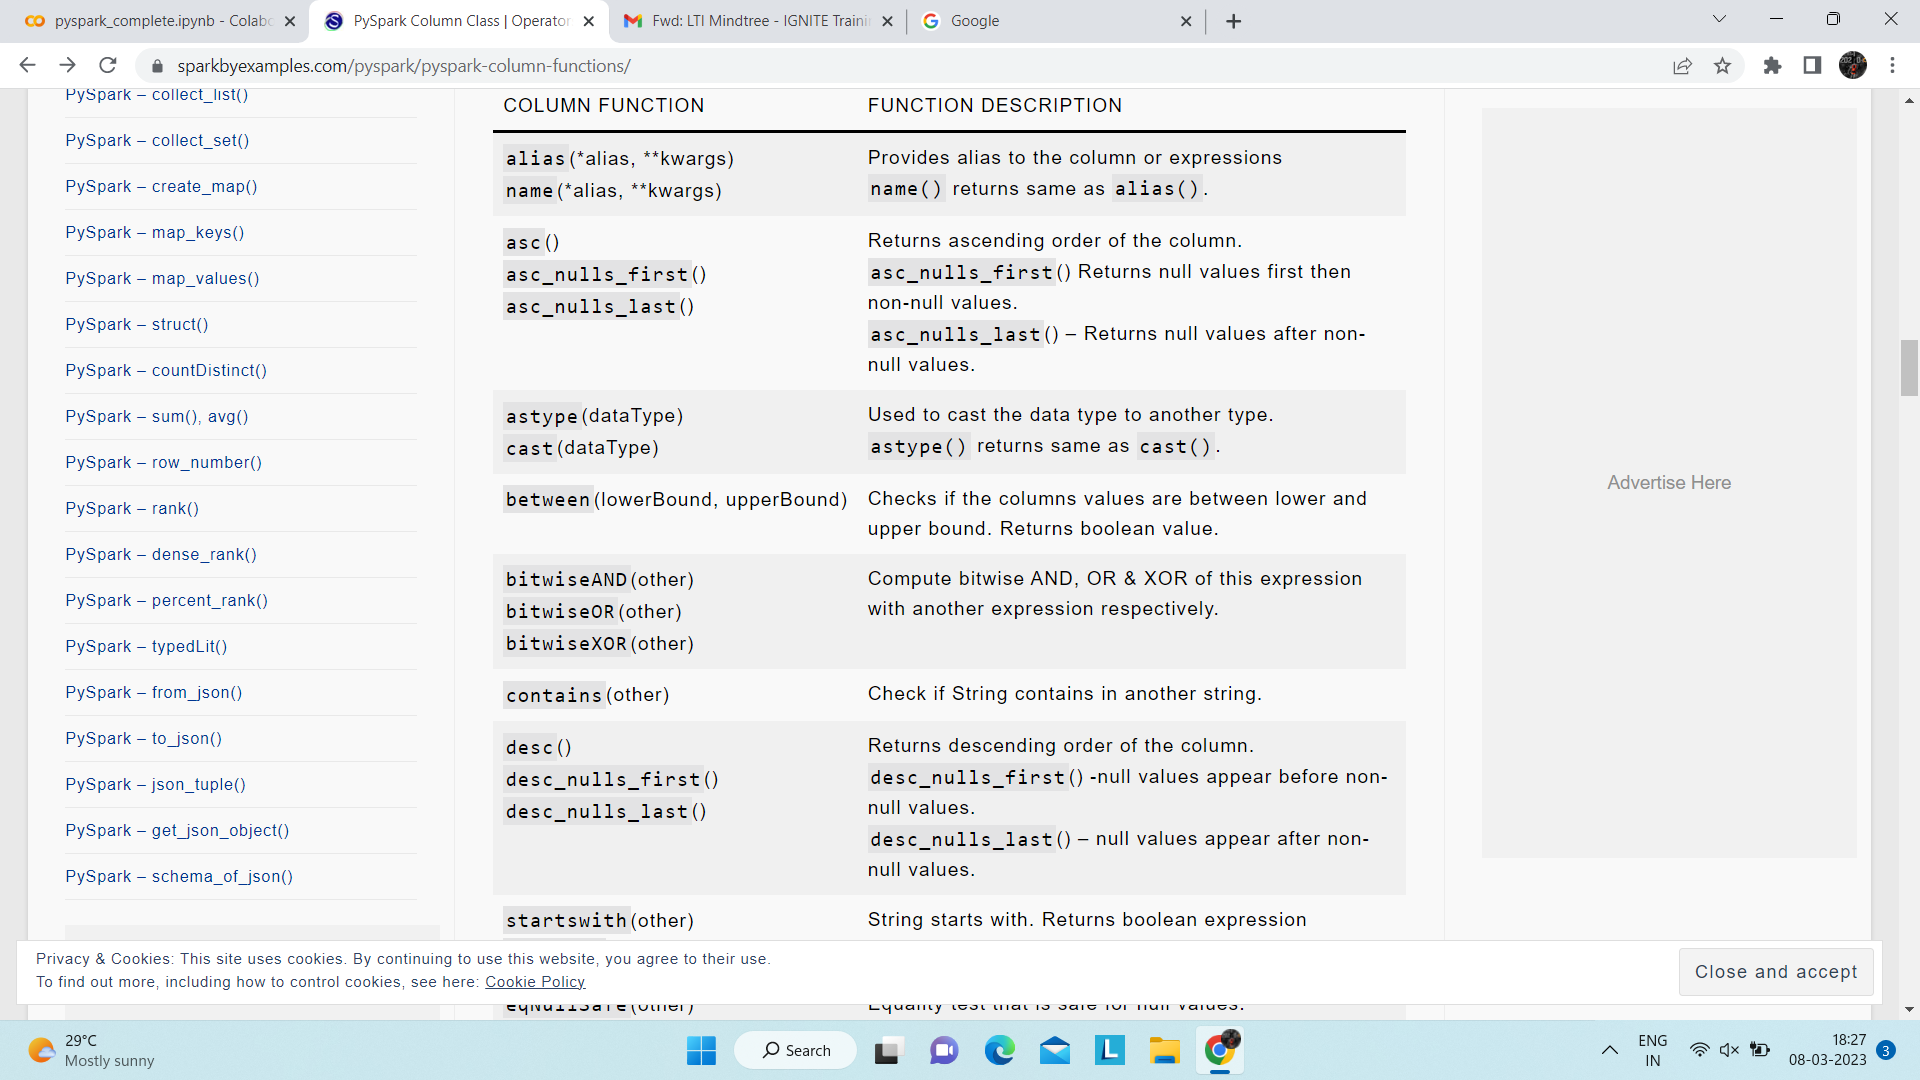

# **4. PySpark Column Functions Examples**

In [ ]:

data=[("James","Bond","100",None),
      ("Ann","Varsa","200",'F'),
      ("Tom Cruise","XXX","400",''),
      ("Tom Brand",None,"400",'M')] 
columns=["fname","lname","id","gender"]
df=spark.createDataFrame(data,columns)


**4.1 alias() – Set’s name to Column**

In [ ]:

#alias
from pyspark.sql.functions import expr
df.select(df.fname.alias("first_name"), \
          df.lname.alias("last_name")
   ).show()

#Another example
df.select(expr(" fname ||','|| lname").alias("fullName") \
   ).show()


+----------+---------+
|first_name|last_name|
+----------+---------+
|     James|     Bond|
|       Ann|    Varsa|
|Tom Cruise|      XXX|
| Tom Brand|     null|
+----------+---------+

+--------------+
|      fullName|
+--------------+
|    James,Bond|
|     Ann,Varsa|
|Tom Cruise,XXX|
|          null|
+--------------+



**4.3 cast() & astype() – Used to convert the data Type.**

In [ ]:

#asc, desc to sort ascending and descending order repsectively.
df.sort(df.fname.asc()).show()
df.sort(df.fname.desc()).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|       Ann|Varsa|200|     F|
|     James| Bond|100|  null|
| Tom Brand| null|400|     M|
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
+----------+-----+---+------+



**4.3 cast() & astype() – Used to convert the data Type.**

In [ ]:

#cast
df.select(df.fname,df.id.cast("int")).printSchema()


root
 |-- fname: string (nullable = true)
 |-- id: integer (nullable = true)



**4.4 between() – Returns a Boolean expression when a column values in between lower and upper bound.**

In [ ]:

#between
df.filter(df.id.between(100,300)).show()


+-----+-----+---+------+
|fname|lname| id|gender|
+-----+-----+---+------+
|James| Bond|100|  null|
|  Ann|Varsa|200|     F|
+-----+-----+---+------+



**4.5 contains() – Checks if a DataFrame column value contains a a value specified in this function.**

In [ ]:

#contains
df.filter(df.fname.contains("Cruise")).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



**4.6 startswith() & endswith() – Checks if the value of the DataFrame Column starts and ends with a String respectively.**

In [ ]:

#startswith, endswith()
df.filter(df.fname.startswith("T")).show()
df.filter(df.fname.endswith("Cruise")).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
+----------+-----+---+------+

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



**4.7 eqNullSafe()**

**4.8 isNull & isNotNull() – Checks if the DataFrame column has NULL or non NULL values.**

In [ ]:

#isNull & isNotNull
df.filter(df.lname.isNull()).show()
df.filter(df.lname.isNotNull()).show()


+---------+-----+---+------+
|    fname|lname| id|gender|
+---------+-----+---+------+
|Tom Brand| null|400|     M|
+---------+-----+---+------+

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



**4.9 like() & rlike() – Similar to SQL LIKE expression**

In [ ]:

#like , rlike
df.select(df.fname,df.lname,df.id) \
  .filter(df.fname.like("%om"))                       #same as sql  like


DataFrame[fname: string, lname: string, id: string]

**4.10 substr() – Returns a Column after getting sub string from the Column**

In [ ]:

df.select(df.fname.substr(1,2).alias("substr")).show()


+------+
|substr|
+------+
|    Ja|
|    An|
|    To|
|    To|
+------+



**4.11 when() & otherwise() – It is similar to SQL Case When, executes sequence of expressions until it matches the condition and returns a value when match.**

In [ ]:

#when & otherwise
from pyspark.sql.functions import when
df.select(df.fname,df.lname,when(df.gender=="M","Male") \
              .when(df.gender=="F","Female") \
              .when(df.gender==None ,"") \
              .otherwise(df.gender).alias("new_gender") \
    ).show()


+----------+-----+----------+
|     fname|lname|new_gender|
+----------+-----+----------+
|     James| Bond|      null|
|       Ann|Varsa|    Female|
|Tom Cruise|  XXX|          |
| Tom Brand| null|      Male|
+----------+-----+----------+



**4.12 isin() – Check if value presents in a List.**

In [ ]:

#isin
li=["100","200"]
df.select(df.fname,df.lname,df.id) \
  .filter(df.id.isin(li)) \
  .show()


+-----+-----+---+
|fname|lname| id|
+-----+-----+---+
|James| Bond|100|
|  Ann|Varsa|200|
+-----+-----+---+



**4.13 getField() – To get the value by key from MapType column and by stuct child name from StructType column**

In [ ]:
#Create DataFrame with struct, array & map
from pyspark.sql.types import StructType,StructField,StringType,ArrayType,MapType
data=[(("James","Bond"),["Java","C#"],{'hair':'black','eye':'brown'}),
      (("Ann","Varsa"),[".NET","Python"],{'hair':'brown','eye':'black'}),
      (("Tom Cruise",""),["Python","Scala"],{'hair':'red','eye':'grey'}),
      (("Tom Brand",None),["Perl","Ruby"],{'hair':'black','eye':'blue'})]

schema = StructType([
        StructField('name', StructType([
            StructField('fname', StringType(), True),
            StructField('lname', StringType(), True)])),
        StructField('languages', ArrayType(StringType()),True),
        StructField('properties', MapType(StringType(),StringType()),True)
     ])
df=spark.createDataFrame(data,schema)
df.printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- fname: string (nullable = true)
 |    |-- lname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [ ]:

#getField from MapType
df.select(df.properties.getField("hair")).show()

#getField from Struct
df.select(df.name.getField("fname")).show()


+----------------+
|properties[hair]|
+----------------+
|           black|
|           brown|
|             red|
|           black|
+----------------+

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
|Tom Cruise|
| Tom Brand|
+----------+



**4.14 getItem() – To get the value by index from MapType or ArrayTupe & ny key for MapType column.**

In [ ]:

#getItem() used with ArrayType
df.select(df.languages.getItem(1)).show()

#getItem() used with MapType
df.select(df.properties.getItem("hair")).show()


+------------+
|languages[1]|
+------------+
|          C#|
|      Python|
|       Scala|
|        Ruby|
+------------+

+----------------+
|properties[hair]|
+----------------+
|           black|
|           brown|
|             red|
|           black|
+----------------+



# **PySpark Select Columns From DataFrame**

In PySpark, select() function is used to select single, multiple, column by index, all columns from the list and the nested columns from a DataFrame, PySpark select() is a transformation function hence it returns a new DataFrame with the selected columns.

In [ ]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]
columns = ["firstname","lastname","country","state"]
df = spark.createDataFrame(data = data, schema = columns)
df.show(truncate=False)


+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+



**1. Select Single & Multiple Columns From PySpark**

In [ ]:

df.select("firstname","lastname").show()
df.select(df.firstname,df.lastname).show()
df.select(df["firstname"],df["lastname"]).show()

#By using col() function
from pyspark.sql.functions import col
df.select(col("firstname"),col("lastname")).show()

#Select columns by regular expression
df.select(df.colRegex("`^.*name*`")).show()


+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+



**2. Select All Columns From List**

In [ ]:

# Select All columns from List
df.select(*columns).show()

# Select All columns
df.select([col for col in df.columns]).show()
df.select("*").show()


+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+



**3. Select Columns by Index**

In [ ]:

#Selects first 3 columns and top 3 rows
df.select(df.columns[:3]).show(3)

#Selects columns 2 to 4  and top 3 rows
df.select(df.columns[2:4]).show(3)


+---------+--------+-------+
|firstname|lastname|country|
+---------+--------+-------+
|    James|   Smith|    USA|
|  Michael|    Rose|    USA|
|   Robert|Williams|    USA|
+---------+--------+-------+
only showing top 3 rows

+-------+-----+
|country|state|
+-------+-----+
|    USA|   CA|
|    USA|   NY|
|    USA|   CA|
+-------+-----+
only showing top 3 rows



**4. Select Nested Struct Columns from PySpark**

In [ ]:

data = [
        (("James",None,"Smith"),"OH","M"),
        (("Anna","Rose",""),"NY","F"),
        (("Julia","","Williams"),"OH","F"),
        (("Maria","Anne","Jones"),"NY","M"),
        (("Jen","Mary","Brown"),"NY","M"),
        (("Mike","Mary","Williams"),"OH","M")
        ]

from pyspark.sql.types import StructType,StructField, StringType        
schema = StructType([
    StructField('name', StructType([
         StructField('firstname', StringType(), True),
         StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
         ])),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
     ])
df2 = spark.createDataFrame(data = data, schema = schema)
df2.printSchema()
df2.show(truncate=False) # shows all columns


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+-----+------+
|name                  |state|gender|
+----------------------+-----+------+
|{James, null, Smith}  |OH   |M     |
|{Anna, Rose, }        |NY   |F     |
|{Julia, , Williams}   |OH   |F     |
|{Maria, Anne, Jones}  |NY   |M     |
|{Jen, Mary, Brown}    |NY   |M     |
|{Mike, Mary, Williams}|OH   |M     |
+----------------------+-----+------+



In [ ]:

df2.select("name").show(truncate=False)


+----------------------+
|name                  |
+----------------------+
|{James, null, Smith}  |
|{Anna, Rose, }        |
|{Julia, , Williams}   |
|{Maria, Anne, Jones}  |
|{Jen, Mary, Brown}    |
|{Mike, Mary, Williams}|
+----------------------+



In [ ]:

df2.select("name.firstname","name.lastname").show(truncate=False)


+---------+--------+
|firstname|lastname|
+---------+--------+
|James    |Smith   |
|Anna     |        |
|Julia    |Williams|
|Maria    |Jones   |
|Jen      |Brown   |
|Mike     |Williams|
+---------+--------+



In [ ]:

df2.select("name.*").show(truncate=False) #to get all values from struct column


+---------+----------+--------+
|firstname|middlename|lastname|
+---------+----------+--------+
|James    |null      |Smith   |
|Anna     |Rose      |        |
|Julia    |          |Williams|
|Maria    |Anne      |Jones   |
|Jen      |Mary      |Brown   |
|Mike     |Mary      |Williams|
+---------+----------+--------+



# **PySpark Collect() – Retrieve data from DataFrame**

PySpark RDD/DataFrame collect() is an action operation that is used to retrieve all the elements of the dataset (from all nodes) to the driver node. We should use the collect() on smaller dataset usually after filter(), group() e.t.c. Retrieving larger datasets results in OutOfMemory error.

In [ ]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.show(truncate=False)


+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [ ]:

dataCollect = deptDF.collect()#deptDF.collect() retrieves all elements in a DataFrame as an Array of Row type to the driver node.
print(dataCollect)


[Row(dept_name='Finance', dept_id=10), Row(dept_name='Marketing', dept_id=20), Row(dept_name='Sales', dept_id=30), Row(dept_name='IT', dept_id=40)]


In [ ]:

for row in dataCollect:
    print(row['dept_name'] + "," +str(row['dept_id']))


Finance,10
Marketing,20
Sales,30
IT,40


In [ ]:

#Returns value of First Row, First Column which is "Finance"
deptDF.collect()[0][0]


'Finance'

**1.deptDF.collect() returns Array of Row type.**

**2.deptDF.collect()[0] returns the first element in an array (1st row).**

**3.deptDF.collect[0][0] returns the value of the first row & first column.**

**collect () vs select ()**

select() is a transformation that returns a new DataFrame and holds the columns that are selected whereas collect() is an action that returns the entire data set in an Array to the driver.

# **PySpark withColumn() Usage with Examples**

In [ ]:

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
df = spark.createDataFrame(data=data, schema = columns)


In [ ]:
df.printSchema()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



**1. Change DataType using PySpark withColumn()**

In [ ]:

df.withColumn("salary",col("salary").cast("Integer")).show()


+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



**2. Update The Value of an Existing Column**

In [ ]:

df.withColumn("salary",col("salary")*100).show()


+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|300000|
|  Michael|      Rose|        |2000-05-19|     M|400000|
|   Robert|          |Williams|1978-09-05|     M|400000|
|    Maria|      Anne|   Jones|1967-12-01|     F|400000|
|      Jen|      Mary|   Brown|1980-02-17|     F|  -100|
+---------+----------+--------+----------+------+------+



**3. Create a Column from an Existing**

In [ ]:

df.withColumn("CopiedColumn",col("salary")* -1).show()


+---------+----------+--------+----------+------+------+------------+
|firstname|middlename|lastname|       dob|gender|salary|CopiedColumn|
+---------+----------+--------+----------+------+------+------------+
|    James|          |   Smith|1991-04-01|     M|  3000|       -3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|       -4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|       -4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|       -4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|           1|
+---------+----------+--------+----------+------+------+------------+



**4. Add a New Column using withColumn()**

In [ ]:

df.withColumn("Country", lit("USA")).show()
df.withColumn("Country", lit("USA")) \
  .withColumn("anotherColumn",lit("anotherValue")) \
  .show()


+---------+----------+--------+----------+------+------+-------+
|firstname|middlename|lastname|       dob|gender|salary|Country|
+---------+----------+--------+----------+------+------+-------+
|    James|          |   Smith|1991-04-01|     M|  3000|    USA|
|  Michael|      Rose|        |2000-05-19|     M|  4000|    USA|
|   Robert|          |Williams|1978-09-05|     M|  4000|    USA|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|    USA|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|    USA|
+---------+----------+--------+----------+------+------+-------+

+---------+----------+--------+----------+------+------+-------+-------------+
|firstname|middlename|lastname|       dob|gender|salary|Country|anotherColumn|
+---------+----------+--------+----------+------+------+-------+-------------+
|    James|          |   Smith|1991-04-01|     M|  3000|    USA| anotherValue|
|  Michael|      Rose|        |2000-05-19|     M|  4000|    USA| anotherValue|
|   Robert|        

**5. Rename Column Name**

In [ ]:

df.withColumnRenamed("gender","sex") \
  .show(truncate=False) 


+---------+----------+--------+----------+---+------+
|firstname|middlename|lastname|dob       |sex|salary|
+---------+----------+--------+----------+---+------+
|James    |          |Smith   |1991-04-01|M  |3000  |
|Michael  |Rose      |        |2000-05-19|M  |4000  |
|Robert   |          |Williams|1978-09-05|M  |4000  |
|Maria    |Anne      |Jones   |1967-12-01|F  |4000  |
|Jen      |Mary      |Brown   |1980-02-17|F  |-1    |
+---------+----------+--------+----------+---+------+



**6. Drop Column From PySpark DataFrame**

In [ ]:

df.drop("salary").show() 


+---------+----------+--------+----------+------+
|firstname|middlename|lastname|       dob|gender|
+---------+----------+--------+----------+------+
|    James|          |   Smith|1991-04-01|     M|
|  Michael|      Rose|        |2000-05-19|     M|
|   Robert|          |Williams|1978-09-05|     M|
|    Maria|      Anne|   Jones|1967-12-01|     F|
|      Jen|      Mary|   Brown|1980-02-17|     F|
+---------+----------+--------+----------+------+



# **PySpark withColumnRenamed to Rename Column on DataFrame**

In [ ]:

dataDF = [(('James','','Smith'),'1991-04-01','M',3000),
  (('Michael','Rose',''),'2000-05-19','M',4000),
  (('Robert','','Williams'),'1978-09-05','M',4000),
  (('Maria','Anne','Jones'),'1967-12-01','F',4000),
  (('Jen','Mary','Brown'),'1980-02-17','F',-1)
]


In [ ]:

from pyspark.sql.types import StructType,StructField, StringType, IntegerType
schema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('dob', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('gender', IntegerType(), True)
         ])


In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
df = spark.createDataFrame(data = dataDF, schema = schema)
df.printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)



**1. PySpark withColumnRenamed – To rename DataFrame column name**

In [ ]:

df.withColumnRenamed("dob","DateOfBirth").printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)



**2. PySpark withColumnRenamed – To rename multiple columns**

In [ ]:

df2 = df.withColumnRenamed("dob","DateOfBirth") \
    .withColumnRenamed("salary","salary_amount")
df2.printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)



# **PySpark Where Filter Function | Multiple Conditions**

**1. PySpark DataFrame filter() Syntax**

In [ ]:

from pyspark.sql.types import StructType,StructField 
from pyspark.sql.types import StringType, IntegerType, ArrayType
data = [
    (("James","","Smith"),["Java","Scala","C++"],"OH","M"),
    (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
    (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
    (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
    (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
    (("Mike","Mary","Williams"),["Python","VB"],"OH","M")
 ]
        
schema = StructType([
     StructField('name', StructType([
        StructField('firstname', StringType(), True),
        StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
     ])),
     StructField('languages', ArrayType(StringType()), True),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
 ])

df = spark.createDataFrame(data = data, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|{James, , Smith}      |[Java, Scala, C++]|OH   |M     |
|{Anna, Rose, }        |[Spark, Java, C++]|NY   |F     |
|{Julia, , Williams}   |[CSharp, VB]      |OH   |F     |
|{Maria, Anne, Jones}  |[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}    |[CSharp, VB]      |NY   |M     |
|{Mike, Mary, Williams}|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



**2. DataFrame filter() with Column Condition**

In [ ]:
# Using equals condition
df.filter(df.state == "OH").show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|{James, , Smith}      |[Java, Scala, C++]|OH   |M     |
|{Julia, , Williams}   |[CSharp, VB]      |OH   |F     |
|{Mike, Mary, Williams}|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [ ]:
# not equals condition
df.filter(df.state != "OH") \
    .show(truncate=False) 
df.filter(~(df.state == "OH")) \
    .show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|{Anna, Rose, }      |[Spark, Java, C++]|NY   |F     |
|{Maria, Anne, Jones}|[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|{Anna, Rose, }      |[Spark, Java, C++]|NY   |F     |
|{Maria, Anne, Jones}|[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



**3. DataFrame filter() with SQL Expression**

In [ ]:

#Using SQL Expression
df.filter("gender == 'M'").show()
#For not equal
df.filter("gender != 'M'").show()
df.filter("gender <> 'M'").show()


+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    {James, , Smith}|[Java, Scala, C++]|   OH|     M|
|{Maria, Anne, Jones}|      [CSharp, VB]|   NY|     M|
|  {Jen, Mary, Brown}|      [CSharp, VB]|   NY|     M|
|{Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     {Anna, Rose, }|[Spark, Java, C++]|   NY|     F|
|{Julia, , Williams}|      [CSharp, VB]|   OH|     F|
+-------------------+------------------+-----+------+

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     {Anna, Rose, }|[Spark, Java, C++]|   NY|     F|
|{Julia, , William

**4. PySpark Filter with Multiple Conditions**

In [ ]:

#Filter multiple condition
df.filter( (df.state  == "OH") & (df.gender  == "M") ).show(truncate=False)  


+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|{James, , Smith}      |[Java, Scala, C++]|OH   |M     |
|{Mike, Mary, Williams}|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



**5. Filter Based on List Values**

In [ ]:
#Filter IS IN List values
li=["OH","CA","DE"]
df.filter(df.state.isin(li)).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    {James, , Smith}|[Java, Scala, C++]|   OH|     M|
| {Julia, , Williams}|      [CSharp, VB]|   OH|     F|
|{Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



In [ ]:
# Filter NOT IS IN List values
#These show all records with NY (NY is not part of the list)
df.filter(~df.state.isin(li)).show()
df.filter(df.state.isin(li)==False).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      {Anna, Rose, }|[Spark, Java, C++]|   NY|     F|
|{Maria, Anne, Jones}|      [CSharp, VB]|   NY|     M|
|  {Jen, Mary, Brown}|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      {Anna, Rose, }|[Spark, Java, C++]|   NY|     F|
|{Maria, Anne, Jones}|      [CSharp, VB]|   NY|     M|
|  {Jen, Mary, Brown}|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



**6. Filter Based on Starts With, Ends With, Contains**

In [ ]:

# Using startswith
df.filter(df.state.startswith("N")).show()
#using endswith
df.filter(df.state.endswith("H")).show()

#contains
df.filter(df.state.contains("H")).show()


+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      {Anna, Rose, }|[Spark, Java, C++]|   NY|     F|
|{Maria, Anne, Jones}|      [CSharp, VB]|   NY|     M|
|  {Jen, Mary, Brown}|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    {James, , Smith}|[Java, Scala, C++]|   OH|     M|
| {Julia, , Williams}|      [CSharp, VB]|   OH|     F|
|{Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    {James, , Smith}|[Java, Scala, C++]|   OH|     M|
| {Julia

**7. PySpark Filter like and rlike**

In [ ]:

data2 = [(2,"Michael Rose"),(3,"Robert Williams"),
     (4,"Rames Rose"),(5,"Rames rose")
  ]
df2 = spark.createDataFrame(data = data2, schema = ["id","name"])

# like - SQL LIKE pattern
df2.filter(df2.name.like("%rose%")).show()

# rlike - SQL RLIKE pattern (LIKE with Regex)
#This check case insensitive
df2.filter(df2.name.rlike("(?i)^*rose$")).show()


+---+----------+
| id|      name|
+---+----------+
|  5|Rames rose|
+---+----------+

+---+------------+
| id|        name|
+---+------------+
|  2|Michael Rose|
|  4|  Rames Rose|
|  5|  Rames rose|
+---+------------+



**8. Filter on an Array column**

When you want to filter rows from DataFrame based on value present in an array collection column, you can use the first syntax. The below example uses array_contains() from Pyspark SQL functions which checks if a value contains in an array if present it returns true otherwise false.

In [ ]:

from pyspark.sql.functions import array_contains
df.filter(array_contains(df.languages,"Java")) \
    .show(truncate=False)     


+----------------+------------------+-----+------+
|name            |languages         |state|gender|
+----------------+------------------+-----+------+
|{James, , Smith}|[Java, Scala, C++]|OH   |M     |
|{Anna, Rose, }  |[Spark, Java, C++]|NY   |F     |
+----------------+------------------+-----+------+



**9. Filtering on Nested Struct columns**

In [ ]:

#Struct condition
df.filter(df.name.lastname == "Williams") \
    .show(truncate=False) 


+----------------------+------------+-----+------+
|name                  |languages   |state|gender|
+----------------------+------------+-----+------+
|{Julia, , Williams}   |[CSharp, VB]|OH   |F     |
|{Mike, Mary, Williams}|[Python, VB]|OH   |M     |
+----------------------+------------+-----+------+



# **PySpark Distinct to Drop Duplicate Rows**

In [ ]:

# Import pySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr

# Create SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

# Prepare Data
data = [("James", "Sales", 3000), \
    ("Michael", "Sales", 4600), \
    ("Robert", "Sales", 4100), \
    ("Maria", "Finance", 3000), \
    ("James", "Sales", 3000), \
    ("Scott", "Finance", 3300), \
    ("Jen", "Finance", 3900), \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000), \
    ("Saif", "Sales", 4100) \
  ]

# Create DataFrame
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



**1. Get Distinct Rows (By Comparing All Columns)**

In [ ]:

distinctDF = df.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)


Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|Jen          |Finance   |3900  |
|Michael      |Sales     |4600  |
|Scott        |Finance   |3300  |
|Kumar        |Marketing |2000  |
|James        |Sales     |3000  |
|Robert       |Sales     |4100  |
|Jeff         |Marketing |3000  |
|Saif         |Sales     |4100  |
|Maria        |Finance   |3000  |
+-------------+----------+------+



In [ ]:

df2 = df.dropDuplicates()
print("Distinct count: "+str(df2.count()))
df2.show(truncate=False)


Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|Jen          |Finance   |3900  |
|Michael      |Sales     |4600  |
|Scott        |Finance   |3300  |
|Kumar        |Marketing |2000  |
|James        |Sales     |3000  |
|Robert       |Sales     |4100  |
|Jeff         |Marketing |3000  |
|Saif         |Sales     |4100  |
|Maria        |Finance   |3000  |
+-------------+----------+------+



**2. PySpark Distinct of Selected Multiple Columns**

In [ ]:

dropDisDF = df.dropDuplicates(["department","salary"])
print("Distinct count of department & salary : "+str(dropDisDF.count()))
dropDisDF.show(truncate=False)


Distinct count of department & salary : 8
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|Maria        |Finance   |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Kumar        |Marketing |2000  |
|Jeff         |Marketing |3000  |
|James        |Sales     |3000  |
|Robert       |Sales     |4100  |
|Michael      |Sales     |4600  |
+-------------+----------+------+



# **PySpark orderBy() and sort() explained**

In [ ]:

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Raman","Finance","CA",99000,40,24000), \
    ("Scott","Finance","NY",83000,36,19000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



In [ ]:

df.sort("department","state").show(truncate=False)
df.sort(col("department"),col("state")).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|

**DataFrame sorting using orderBy() function
PySpark DataFrame also provides orderBy() function to sort on one or more columns. By default, it orders by ascending.**

In [ ]:

df.orderBy("department","state").show(truncate=False)
df.orderBy(col("department"),col("state")).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|

**Sort by Ascending (ASC)**

In [ ]:

df.sort(df.department.asc(),df.state.asc()).show(truncate=False)
df.sort(col("department").asc(),col("state").asc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").asc()).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|

**Sort by Descending (DESC)**

In [ ]:

df.sort(df.department.asc(),df.state.desc()).show(truncate=False)
df.sort(col("department").asc(),col("state").desc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").desc()).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Maria        |Finance   |CA   |90000 |24 |23000|

**Using Raw SQL**

In [ ]:

df.createOrReplaceTempView("EMP")
spark.sql("select employee_name,department,state,salary,age,bonus from EMP ORDER BY department asc").show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
+-------------+----------+-----+------+---+-----+



# **PySpark Groupby Explained with Example**

**1. GroupBy() Syntax & Usage**

When we perform groupBy() on PySpark Dataframe, it returns GroupedData object which contains below aggregate functions.

**count()** – Use groupBy() count() to return the number of rows for each group.

**mean()** – Returns the mean of values for each group.

**max()** – Returns the maximum of values for each group.

**min()** – Returns the minimum of values for each group.

**sum()** – Returns the total for values for each group.

**avg()** – Returns the average for values for each group.

**agg()** – Using groupBy() agg() function, we can calculate more than one aggregate at a time.

**pivot()** – This function is used to Pivot the DataFrame which I will not be covered in this article as I already have a dedicated article for Pivot & Unpivot DataFrame.

In [ ]:

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



**2. PySpark groupBy on DataFrame Columns**

In [ ]:

df.groupBy("department").count().show()   #count


+----------+-----+
|department|count|
+----------+-----+
|     Sales|    3|
|   Finance|    4|
| Marketing|    2|
+----------+-----+



In [ ]:

df.groupBy("department").min("salary").show()   #min


+----------+-----------+
|department|min(salary)|
+----------+-----------+
|     Sales|      81000|
|   Finance|      79000|
| Marketing|      80000|
+----------+-----------+



In [ ]:

df.groupBy("department").max("salary").show()


+----------+-----------+
|department|max(salary)|
+----------+-----------+
|     Sales|      90000|
|   Finance|      99000|
| Marketing|      91000|
+----------+-----------+



In [ ]:

df.groupBy("department").avg( "salary")


DataFrame[department: string, avg(salary): double]

In [ ]:

df.groupBy("department").mean( "salary") 


DataFrame[department: string, avg(salary): double]

**3. Using Multiple columns**

Similarly, we can also run groupBy and aggregate on two or more DataFrame columns, below example does group by on department,state and does sum() on salary and bonus columns.

**4. Running more aggregates at a time**

In [ ]:

from pyspark.sql.functions import sum,avg,max
df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("bonus").alias("sum_bonus"), \
         max("bonus").alias("max_bonus") \
     ) \
    .show(truncate=False)


+----------+----------+-----------------+---------+---------+
|department|sum_salary|avg_salary       |sum_bonus|max_bonus|
+----------+----------+-----------------+---------+---------+
|Sales     |257000    |85666.66666666667|53000    |23000    |
|Finance   |351000    |87750.0          |81000    |24000    |
|Marketing |171000    |85500.0          |39000    |21000    |
+----------+----------+-----------------+---------+---------+



**5. Using filter on aggregate data**

In [ ]:

from pyspark.sql.functions import sum,avg,max
df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
      avg("salary").alias("avg_salary"), \
      sum("bonus").alias("sum_bonus"), \
      max("bonus").alias("max_bonus")) \
    .where(col("sum_bonus") >= 50000) \
    .show(truncate=False)


+----------+----------+-----------------+---------+---------+
|department|sum_salary|avg_salary       |sum_bonus|max_bonus|
+----------+----------+-----------------+---------+---------+
|Sales     |257000    |85666.66666666667|53000    |23000    |
|Finance   |351000    |87750.0          |81000    |24000    |
+----------+----------+-----------------+---------+---------+



# **PySpark Join Types | Join Two DataFrames**

**1. PySpark Join Syntax**


**2. PySpark Join Types**

Below are the different Join Types PySpark supports.

Join String	,                                                 Equivalent SQL Join

inner	                                                      INNER JOIN

outer, full, fullouter, full_outer                         FULL OUTER JOIN

left, leftouter, left_outer	                                  LEFT JOIN

right, rightouter, right_outer	                              RIGHT JOIN

cross	

anti, leftanti, left_anti	

semi, leftsemi, left_semi	

---



In [ ]:

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)


root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

**3. PySpark Inner Join DataFrame**

Inner join is the default join in PySpark and it’s mostly used. This joins two datasets on key columns, where keys don’t match the rows get dropped from both datasets (emp & dept).

In [ ]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner") \
     .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



**4. PySpark Full Outer Join**

Outer a.k.a full, fullouter join returns all rows from both datasets, where join expression doesn’t match it returns null on respective record columns.



In [ ]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+-

**5. PySpark Left Outer Join**

Left a.k.a Leftouter join returns all rows from the left dataset regardless of match found on the right dataset when join expression doesn’t match, it assigns null for that record and drops records from right where match not found.

In [ ]:

  empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left").show(truncate=False)
  empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter").show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

**6. Right Outer Join**

Right a.k.a Rightouter join is opposite of left join, here it returns all rows from the right dataset regardless of math found on the left dataset, when join expression doesn’t match, it assigns null for that record and drops records from left where match not found.

In [ ]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightouter") \
   .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

**7. Left Semi Join**

leftsemi join is similar to inner join difference being leftsemi join returns all columns from the left dataset and ignores all columns from the right dataset. In other words, this join returns columns from the only left dataset for the records match in the right dataset on join expression, records not matched on join expression are ignored from both left and right datasets.

In [ ]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftsemi") \
   .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
+------+--------+---------------+-----------+-----------+------+------+



**8. Left Anti Join**

leftanti join does the exact opposite of the leftsemi, leftanti join returns only columns from the left dataset for non-matched records.

In [ ]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftanti") \
   .show(truncate=False)


+------+-----+---------------+-----------+-----------+------+------+
|emp_id|name |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+-----+---------------+-----------+-----------+------+------+
|6     |Brown|2              |2010       |50         |      |-1    |
+------+-----+---------------+-----------+-----------+------+------+



**9. PySpark Self Join**

In [ ]:

empDF.alias("emp1").join(empDF.alias("emp2"), \
    col("emp1.superior_emp_id") == col("emp2.emp_id"),"inner") \
    .select(col("emp1.emp_id"),col("emp1.name"), \
      col("emp2.emp_id").alias("superior_emp_id"), \
      col("emp2.name").alias("superior_emp_name")) \
   .show(truncate=False)


+------+--------+---------------+-----------------+
|emp_id|name    |superior_emp_id|superior_emp_name|
+------+--------+---------------+-----------------+
|2     |Rose    |1              |Smith            |
|3     |Williams|1              |Smith            |
|4     |Jones   |2              |Rose             |
|5     |Brown   |2              |Rose             |
|6     |Brown   |2              |Rose             |
+------+--------+---------------+-----------------+



**4. Using SQL Expression**

In [ ]:

empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")

joinDF = spark.sql("select * from EMP e, DEPT d where e.emp_dept_id == d.dept_id") \
  .show(truncate=False)

joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id") \
  .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+-

**5. PySpark SQL Join on multiple DataFrames**

In [ ]:

# complete example
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)


dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)
  
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner") \
     .show(truncate=False)

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)
    
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter") \
   .show(truncate=False)

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightouter") \
   .show(truncate=False)

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftsemi") \
   .show(truncate=False)
   
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftanti") \
   .show(truncate=False)
   
empDF.alias("emp1").join(empDF.alias("emp2"), \
    col("emp1.superior_emp_id") == col("emp2.emp_id"),"inner") \
    .select(col("emp1.emp_id"),col("emp1.name"), \
      col("emp2.emp_id").alias("superior_emp_id"), \
      col("emp2.name").alias("superior_emp_name")) \
   .show(truncate=False)

empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")
   
joinDF = spark.sql("select * from EMP e, DEPT d where e.emp_dept_id == d.dept_id") \
  .show(truncate=False)

joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id") \
  .show(truncate=False)




root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

# **PySpark Union and UnionAll Explained**

**Dataframe union()** – union() method of the DataFrame is used to merge two DataFrame’s of the same structure/schema. If schemas are not the same it returns an error.

**DataFrame unionAll()** – unionAll() is deprecated since Spark “2.0.0” version and replaced with union().

In [ ]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000) \
  ]

columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
+-------------+----------+-----+------+---+-----+



In [ ]:

simpleData2 = [("James","Sales","NY",90000,34,10000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns2= ["employee_name","department","state","salary","age","bonus"]

df2 = spark.createDataFrame(data = simpleData2, schema = columns2)

df2.printSchema()
df2.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



**Merge two or more DataFrames using union**

DataFrame unionAll() method is deprecated since PySpark “2.0.0” version and recommends using the union() method.

In [ ]:

unionDF = df.union(df2)
unionDF.show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



**Merge without Duplicates**

In [ ]:

disDF = df.union(df2).distinct()
disDF.show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
+-------------+----------+-----+------+---+-----+



# **PySpark unionByName()**

**2. Difference between PySpark**

 unionByName() vs union()
 
The difference between unionByName() function and union() is that this function
resolves columns by name (not by position). In other words, unionByName() is used to merge two DataFrames by column names instead of by position.

PySpark unionByName() is used to union two DataFrames when you have column names in a different order or even if you have missing columns in any DataFrme, in other words, this function
resolves columns by name (not by position). First, let’s create DataFrames with the different number of columns.

In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

# Create DataFrame df1 with columns name, and id
data = [("James",34), ("Michael",56), \
        ("Robert",30), ("Maria",24) ]

df1 = spark.createDataFrame(data = data, schema=["name","id"])
df1.printSchema()

# Create DataFrame df2 with columns name and id
data2=[(34,"James"),(45,"Maria"), \
       (45,"Jen"),(34,"Jeff")]

df2 = spark.createDataFrame(data = data2, schema = ["id","name"])
df2.printSchema()


root
 |-- name: string (nullable = true)
 |-- id: long (nullable = true)

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
#unionbyname

# unionByName() example
df3 = df1.unionByName(df2)
df3.printSchema
df3.show()


+-------+---+
|   name| id|
+-------+---+
|  James| 34|
|Michael| 56|
| Robert| 30|
|  Maria| 24|
|  James| 34|
|  Maria| 45|
|    Jen| 45|
|   Jeff| 34|
+-------+---+



**4. Use unionByName() with Different Number of Columns**

. If you have a different number of columns then use allowMissingColumns=True. When using this, the result of the DataFrmae contains null values for the columns that are missing on the DataFrame.

Note that param allowMissingColumns is available since Spark 3.1 version.

In [ ]:

# Create DataFrames with different column names
df1 = spark.createDataFrame([[5, 2, 6]], ["col0", "col1", "col2"])
df2 = spark.createDataFrame([[6, 7, 3]], ["col1", "col2", "col3"])

# Using allowMissingColumns
df3 = df1.unionByName(df2, allowMissingColumns=True)
df3.printSchema
df3.show()


+----+----+----+----+
|col0|col1|col2|col3|
+----+----+----+----+
|   5|   2|   6|null|
|null|   6|   7|   3|
+----+----+----+----+



# **PySpark UDF (User Defined Function)**

PySpark UDF (a.k.a User Defined Function) is the most useful feature of Spark SQL & DataFrame that is used to extend the PySpark build in capabilities

In [ ]:

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

columns = ["Seqno","Name"]
data = [("1", "john jones"),
    ("2", "tracey smith"),
    ("3", "amy sanders")]

df = spark.createDataFrame(data=data,schema=columns)

df.show(truncate=False)


+-----+------------+
|Seqno|Name        |
+-----+------------+
|1    |john jones  |
|2    |tracey smith|
|3    |amy sanders |
+-----+------------+



**2.2 Create a Python Function**

In [ ]:

def convertCase(str):
    resStr=""
    arr = str.split(" ")
    for x in arr:
       resStr= resStr + x[0:1].upper() + x[1:len(x)] + " "
    return resStr 


In [ ]:

from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

# Converting function to UDF 
convertUDF = udf(lambda z: convertCase(z),StringType())


In [ ]:

# Converting function to UDF 
# StringType() is by default hence not required 
convertUDF = udf(lambda z: convertCase(z)) 


**Example 2**

In [ ]:

def upperCase(str):
    return str.upper()


In [ ]:

upperCaseUDF = udf(lambda z:upperCase(z),StringType())   

df.withColumn("Cureated Name", upperCaseUDF(col("Name"))) \
  .show(truncate=False)


+-----+------------+-------------+
|Seqno|Name        |Cureated Name|
+-----+------------+-------------+
|1    |john jones  |JOHN JONES   |
|2    |tracey smith|TRACEY SMITH |
|3    |amy sanders |AMY SANDERS  |
+-----+------------+-------------+



# **PySpark transform() Function with Example**

In [ ]:

# Imports
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
            .appName('SparkByExamples.com') \
            .getOrCreate()

# Prepare Data
simpleData = (("Java",4000,5), \
    ("Python", 4600,10),  \
    ("Scala", 4100,15),   \
    ("Scala", 4500,15),   \
    ("PHP", 3000,20),  \
  )
columns= ["CourseName", "fee", "discount"]

# Create DataFrame
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- CourseName: string (nullable = true)
 |-- fee: long (nullable = true)
 |-- discount: long (nullable = true)

+----------+----+--------+
|CourseName|fee |discount|
+----------+----+--------+
|Java      |4000|5       |
|Python    |4600|10      |
|Scala     |4100|15      |
|Scala     |4500|15      |
|PHP       |3000|20      |
+----------+----+--------+



**1. PySpark DataFrame.transform()**

The pyspark.sql.DataFrame.transform() is used to chain the custom transformations and this function returns the new DataFrame after applying the specified transformations.


**Syntax**

DataFrame.transform(func: Callable[[…], DataFrame], *args: Any, **kwargs: Any) → pyspark.sql.dataframe.DataFrame


The following are the parameters:

func – Custom function to call.

*args – Arguments to pass to func.

*kwargs – Keyword arguments to pass to func.

In [ ]:

# Custom transformation 1
from pyspark.sql.functions import upper
def to_upper_str_columns(df):
    return df.withColumn("CourseName",upper(df.CourseName))

# Custom transformation 2
def reduce_price(df,reduceBy):
    return df.withColumn("new_fee",df.fee - reduceBy)

# Custom transformation 3
def apply_discount(df):
    return df.withColumn("discounted_fee",  \
             df.new_fee - (df.new_fee * df.discount) / 100)


In [ ]:

# PySpark transform() Usage
df2 = df.transform(to_upper_str_columns) \
        .transform(reduce_price,1000) \
        .transform(apply_discount)


In [ ]:

# custom function
def select_columns(df):
    return df.select("CourseName","discounted_fee")

# Chain transformations
df2 = df.transform(to_upper_str_columns) \
        .transform(reduce_price,1000) \
        .transform(apply_discount) \
        .transform(select_columns)


**2. PySpark sql.functions.transform()**

In [ ]:

# Create DataFrame with Array
data = [
 ("James,,Smith",["Java","Scala","C++"],["Spark","Java"]),
 ("Michael,Rose,",["Spark","Java","C++"],["Spark","Java"]),
 ("Robert,,Williams",["CSharp","VB"],["Spark","Python"])
]
df = spark.createDataFrame(data=data,schema=["Name","Languages1","Languages2"])
df.printSchema()
df.show()

# using transform() function
from pyspark.sql.functions import upper
from pyspark.sql.functions import transform
df.select(transform("Languages1", lambda x: upper(x)).alias("languages1")) \
  .show()


root
 |-- Name: string (nullable = true)
 |-- Languages1: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Languages2: array (nullable = true)
 |    |-- element: string (containsNull = true)

+----------------+------------------+---------------+
|            Name|        Languages1|     Languages2|
+----------------+------------------+---------------+
|    James,,Smith|[Java, Scala, C++]|  [Spark, Java]|
|   Michael,Rose,|[Spark, Java, C++]|  [Spark, Java]|
|Robert,,Williams|      [CSharp, VB]|[Spark, Python]|
+----------------+------------------+---------------+

+------------------+
|        languages1|
+------------------+
|[JAVA, SCALA, C++]|
|[SPARK, JAVA, C++]|
|      [CSHARP, VB]|
+------------------+



#PySpark apply Function to Column

In [ ]:

# Apply function using withColumn
from pyspark.sql.functions import upper
df.withColumn("Upper_Name", upper(df.Name)) \
  .show()


+----------------+------------------+---------------+----------------+
|            Name|        Languages1|     Languages2|      Upper_Name|
+----------------+------------------+---------------+----------------+
|    James,,Smith|[Java, Scala, C++]|  [Spark, Java]|    JAMES,,SMITH|
|   Michael,Rose,|[Spark, Java, C++]|  [Spark, Java]|   MICHAEL,ROSE,|
|Robert,,Williams|      [CSharp, VB]|[Spark, Python]|ROBERT,,WILLIAMS|
+----------------+------------------+---------------+----------------+



#PySpark map() Transformation

PySpark map (map()) is an RDD transformation that is used to apply the transformation function (lambda) on every element of RDD/DataFrame and returns a new RDD.

In [ ]:

 #rdd creation
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
    .appName("SparkByExamples.com").getOrCreate()

data = ["Project","Gutenberg’s","Alice’s","Adventures",
"in","Wonderland","Project","Gutenberg’s","Adventures",
"in","Wonderland","Project","Gutenberg’s"]

rdd=spark.sparkContext.parallelize(data)



In [ ]:
#map example

rdd2=rdd.map(lambda x: (x,1))
for element in rdd2.collect():
    print(element)



('Project', 1)
('Gutenberg’s', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)


#PySpark flatMap() Transformation


PySpark flatMap() is a transformation operation that flattens the RDD/DataFrame (array/map DataFrame columns) after applying the function on every element and returns a new PySpark RDD/DataFrame

In [ ]:

data = ["Project Gutenberg’s",
        "Alice’s Adventures in Wonderland",
        "Project Gutenberg’s",
        "Adventures in Wonderland",
        "Project Gutenberg’s"]
rdd=spark.sparkContext.parallelize(data)
for element in rdd.collect():
    print(element)


Project Gutenberg’s
Alice’s Adventures in Wonderland
Project Gutenberg’s
Adventures in Wonderland
Project Gutenberg’s


In [ ]:

rdd2=rdd.flatMap(lambda x: x.split(" "))
for element in rdd2.collect():
    print(element)


Project
Gutenberg’s
Alice’s
Adventures
in
Wonderland
Project
Gutenberg’s
Adventures
in
Wonderland
Project
Gutenberg’s


#PySpark foreach() 

**1. PySpark DataFrame foreach()**

For Each is used to iterate each and every element in a PySpark.

In [ ]:

# Import
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com') \
                    .getOrCreate()

# Prepare Data
columns = ["Seqno","Name"]
data = [("1", "john jones"),
    ("2", "tracey smith"),
    ("3", "amy sanders")]

# Create DataFrame
df = spark.createDataFrame(data=data,schema=columns)
df.show()

# foreach() Example
def f(df):
    print(df.Seqno)
df.foreach(f)


+-----+------------+
|Seqno|        Name|
+-----+------------+
|    1|  john jones|
|    2|tracey smith|
|    3| amy sanders|
+-----+------------+



#PySpark Random Sample 

PySpark provides a pyspark.sql.DataFrame.sample(), pyspark.sql.DataFrame.sampleBy(), RDD.sample(), and RDD.takeSample() methods to get the random sampling subset from the large dataset, 

**1.1 Using fraction to get a random sample in PySpark** 

By using fraction between 0 to 1, it returns the approximate number of the fraction of the dataset. For example, 0.1 returns 10% of the rows. However, this does not guarantee it returns the exact 10% of the records.

In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

df=spark.range(100)
print(df.sample(0.06).collect())

#My DataFrame has 100 records and I wanted to get 6% sample records which are 6 but the sample() function returned 3 records. This proves the sample function doesn’t return the exact fraction specified.

[Row(id=20), Row(id=31), Row(id=41), Row(id=49), Row(id=56), Row(id=71), Row(id=73), Row(id=85), Row(id=92), Row(id=94), Row(id=96)]


**1.2 Using seed to reproduce the same Samples in PySpark**

Every time you run a sample() function it returns a different set of sampling records, however sometimes during the development and testing phase you may need to regenerate the same sample every time as you need to compare the results from your previous run. To get consistent same random sampling uses the same slice value for every run. Change slice value to get different results.

In [ ]:

print(df.sample(0.1,123).collect())


print(df.sample(0.1,123).collect())


print(df.sample(0.1,456).collect())



[Row(id=36), Row(id=37), Row(id=41), Row(id=43), Row(id=56), Row(id=66), Row(id=69), Row(id=75), Row(id=83)]
[Row(id=36), Row(id=37), Row(id=41), Row(id=43), Row(id=56), Row(id=66), Row(id=69), Row(id=75), Row(id=83)]
[Row(id=19), Row(id=21), Row(id=42), Row(id=48), Row(id=49), Row(id=50), Row(id=75), Row(id=80)]


**1.3 Sample withReplacement (May contain duplicates)**

some times you may need to get a random sample with repeated values. By using the value true, results in repeated values.

In [ ]:

print(df.sample(True,0.3,123).collect()) #with Duplicates

print(df.sample(0.3,123).collect()) #No duplicates



[Row(id=0), Row(id=5), Row(id=9), Row(id=11), Row(id=14), Row(id=14), Row(id=16), Row(id=17), Row(id=21), Row(id=29), Row(id=33), Row(id=41), Row(id=42), Row(id=52), Row(id=52), Row(id=54), Row(id=58), Row(id=65), Row(id=65), Row(id=71), Row(id=76), Row(id=79), Row(id=85), Row(id=96)]
[Row(id=0), Row(id=4), Row(id=17), Row(id=19), Row(id=24), Row(id=25), Row(id=26), Row(id=36), Row(id=37), Row(id=41), Row(id=43), Row(id=44), Row(id=53), Row(id=56), Row(id=66), Row(id=68), Row(id=69), Row(id=70), Row(id=71), Row(id=75), Row(id=76), Row(id=78), Row(id=83), Row(id=84), Row(id=88), Row(id=94), Row(id=96), Row(id=97), Row(id=98)]


**sample in rdd**

In [ ]:

rdd = spark.sparkContext.range(0,100)
print(rdd.sample(False,0.1,0).collect())

print(rdd.sample(True,0.3,123).collect())


[24, 29, 41, 64, 86]
[0, 11, 13, 14, 16, 18, 21, 23, 27, 31, 32, 32, 48, 49, 49, 53, 54, 72, 74, 77, 77, 83, 88, 91, 93, 98, 99]


In [ ]:

print(rdd.takeSample(False,10,0))   #can use takesample

print(rdd.takeSample(True,30,123))



[58, 1, 96, 74, 29, 24, 32, 37, 94, 91]
[43, 65, 39, 18, 84, 86, 25, 13, 40, 21, 79, 63, 7, 32, 26, 71, 23, 61, 83, 60, 22, 35, 84, 22, 0, 88, 16, 40, 65, 84]


# **PySpark fillna() & fill() – Replace NULL/None Values**


Replace 0 for null for all integer columns

df.na.fill(value=0).show()

Replace 0 for null on only population column 

df.na.fill(value=0,subset=["population"]).show()


**PySpark Replace Null/None Value with Empty String**


df.na.fill("").show(false)


below example replace column type with empty string and column city with value “unknown”.


df.na.fill("unknown",["city"]) \
    .na.fill("",["type"]).show()
    
or


df.na.fill({"city": "unknown", "type": ""}).show()


**PySpark Pivot and Unpivot DataFrame**

In [ ]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
#Create spark session
data = [("Banana",1000,"USA"), ("Carrots",1500,"USA"), ("Beans",1600,"USA"), \
      ("Orange",2000,"USA"),("Orange",2000,"USA"),("Banana",400,"China"), \
      ("Carrots",1200,"China"),("Beans",1500,"China"),("Orange",4000,"China"), \
      ("Banana",2000,"Canada"),("Carrots",2000,"Canada"),("Beans",2000,"Mexico")]

columns= ["Product","Amount","Country"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)




root
 |-- Product: string (nullable = true)
 |-- Amount: long (nullable = true)
 |-- Country: string (nullable = true)

+-------+------+-------+
|Product|Amount|Country|
+-------+------+-------+
|Banana |1000  |USA    |
|Carrots|1500  |USA    |
|Beans  |1600  |USA    |
|Orange |2000  |USA    |
|Orange |2000  |USA    |
|Banana |400   |China  |
|Carrots|1200  |China  |
|Beans  |1500  |China  |
|Orange |4000  |China  |
|Banana |2000  |Canada |
|Carrots|2000  |Canada |
|Beans  |2000  |Mexico |
+-------+------+-------+



**Pivot PySpark DataFrame**

PySpark SQL provides pivot() function to rotate the data from one column into multiple columns. It is an aggregation where one of the grouping columns values is transposed into individual columns with distinct data. To get the total amount exported to each country of each product, will do group by Product, pivot by Country, and the sum of Amount.

In [ ]:

pivotDF = df.groupBy("Product").pivot("Country").sum("Amount")
pivotDF.printSchema()
pivotDF.show(truncate=False)


root
 |-- Product: string (nullable = true)
 |-- Canada: long (nullable = true)
 |-- China: long (nullable = true)
 |-- Mexico: long (nullable = true)
 |-- USA: long (nullable = true)

+-------+------+-----+------+----+
|Product|Canada|China|Mexico|USA |
+-------+------+-----+------+----+
|Orange |null  |4000 |null  |4000|
|Beans  |null  |1500 |2000  |1600|
|Banana |2000  |400  |null  |1000|
|Carrots|2000  |1200 |null  |1500|
+-------+------+-----+------+----+



**Pivot Performance improvement in PySpark 2.0**

In [ ]:

countries = ["USA","China","Canada","Mexico"]
pivotDF = df.groupBy("Product").pivot("Country", countries).sum("Amount")
pivotDF.show(truncate=False)


+-------+----+-----+------+------+
|Product|USA |China|Canada|Mexico|
+-------+----+-----+------+------+
|Orange |4000|4000 |null  |null  |
|Beans  |1600|1500 |null  |2000  |
|Banana |1000|400  |2000  |null  |
|Carrots|1500|1200 |2000  |null  |
+-------+----+-----+------+------+



**PySpark partitionBy()**

park partitionBy() is a function of pyspark.sql.DataFrameWriter class which is used to partition the large dataset (DataFrame) into smaller files based on one or multiple column

In [ ]:

#partitionBy()
'''df.write.option("header",True) \
        .partitionBy("state") \
        .mode("overwrite") \
        .csv("/tmp/zipcodes-state")'''


'df.write.option("header",True)         .partitionBy("state")         .mode("overwrite")         .csv("/tmp/zipcodes-state")'

#PySpark SQL Functions

**PySpark Aggregate Functions**

In [ ]:

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



**approx_count_distinct Aggregate Function**

In PySpark approx_count_distinct() function returns the count of distinct items in a group.

In [ ]:
from pyspark.sql.functions import approx_count_distinct,collect_list

print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))



approx_count_distinct: 6


**avg (average) Aggregate Function**

In [ ]:


print("avg: " + str(df.select(avg("salary")).collect()[0][0]))



avg: 3400.0


**collect_list Aggregate Function**

collect_list() function returns all values from an input column with duplicates.

In [ ]:
df.select(collect_list("salary")).show(truncate=False)

+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+



**collect_set Aggregate Function**

In [ ]:
from pyspark.sql.functions import collect_set
df.select(collect_set("salary")).show(truncate=False)

+------------------------------------+
|collect_set(salary)                 |
+------------------------------------+
|[4600, 3000, 3900, 4100, 3300, 2000]|
+------------------------------------+



**countDistinct Aggregate Function**

In [ ]:
#countDistinct
from pyspark.sql.functions import *
df2 = df.select(countDistinct("department", "salary"))
df2.show(truncate=False)
print("Distinct Count of Department & Salary: "+str(df2.collect()[0][0]))


+----------------------------------+
|count(DISTINCT department, salary)|
+----------------------------------+
|8                                 |
+----------------------------------+

Distinct Count of Department & Salary: 8


**count function**

In [ ]:

print("count: "+str(df.select(count("salary")).collect()[0]))



count: Row(count(salary)=10)


**grouping function**

grouping() Indicates whether a given input column is aggregated or not. returns 1 for aggregated or 0 for not aggregated in the result. If you try grouping directly on the salary column you will get below error.


Exception in thread "main" org.apache.spark.sql.AnalysisException:

**first function**

first() function returns the first element in a column when ignoreNulls is set to true, it returns the first non-null element.

In [ ]:
df.select(first("salary")).show(truncate=False)


+-------------+
|first(salary)|
+-------------+
|3000         |
+-------------+



**last function**

last() function returns the last element in a column. when ignoreNulls is set to true, it returns the last non-null element.

In [ ]:
df.select(last("salary")).show(truncate=False)

+------------+
|last(salary)|
+------------+
|4100        |
+------------+



**kurtosis function**

kurtosis() function returns the kurtosis of the values in a group.

Kurtosis is a statistical measure used to describe the distribution of observed data around the mean.

**max function**

max() function returns the maximum value in a column.

In [ ]:
df.select(max("salary")).show(truncate=False)  # same for mean ,min andskewness

+-----------+
|max(salary)|
+-----------+
|4600       |
+-----------+



In [ ]:
df.select(kurtosis("salary")).show(truncate=False)

+-------------------+
|kurtosis(salary)   |
+-------------------+
|-0.6467803030303032|
+-------------------+



**stddev(), stddev_samp() and stddev_pop()**
**stddev() alias for stddev_samp.**

stddev_samp() function returns the sample standard deviation of values in a column.

stddev_pop() function returns the population standard deviation of the values in a column.

**sum function**

sum() function Returns the sum of all values in a column.

In [ ]:
df.select(sum("salary")).show(truncate=False)


+-----------+
|sum(salary)|
+-----------+
|34000      |
+-----------+



**sumDistinct function**

sumDistinct() function returns the sum of all distinct values in a column.

In [ ]:
df.select(sumDistinct("salary")).show(truncate=False)

/usr/local/lib/python3.9/dist-packages/pyspark/sql/functions.py:316: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+--------------------+
|sum(DISTINCT salary)|
+--------------------+
|20900               |
+--------------------+



**variance(), var_samp(), var_pop()**
**variance() alias for var_samp**

var_samp() function returns the unbiased variance of the values in a column.

var_pop() function returns the population variance of the values in a column.



# **PySpark Window Functions**

**1. Window Functions**

PySpark Window functions operate on a group of rows (like frame, partition) and return a single value for every input row. PySpark SQL supports three kinds of window functions:

In [ ]:

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = (("James", "Sales", 3000), \
    ("Michael", "Sales", 4600),  \
    ("Robert", "Sales", 4100),   \
    ("Maria", "Finance", 3000),  \
    ("James", "Sales", 3000),    \
    ("Scott", "Finance", 3300),  \
    ("Jen", "Finance", 3900),    \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000),\
    ("Saif", "Sales", 4100) \
  )
 
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



**2. PySpark Window Ranking functions**

2.1 row_number Window Function
row_number() window function is used to give the sequential row number starting from 1 to the result of each window partition.

In [ ]:

from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
windowSpec  = Window.partitionBy("department").orderBy("salary")

df.withColumn("row_number",row_number().over(windowSpec)) \
    .show(truncate=False)


+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|Maria        |Finance   |3000  |1         |
|Scott        |Finance   |3300  |2         |
|Jen          |Finance   |3900  |3         |
|Kumar        |Marketing |2000  |1         |
|Jeff         |Marketing |3000  |2         |
|James        |Sales     |3000  |1         |
|James        |Sales     |3000  |2         |
|Robert       |Sales     |4100  |3         |
|Saif         |Sales     |4100  |4         |
|Michael      |Sales     |4600  |5         |
+-------------+----------+------+----------+



**2.2 rank Window Function**

rank() window function is used to provide a rank to the result within a window partition. This function leaves gaps in rank when there are ties.



In [ ]:

"""rank"""
from pyspark.sql.functions import rank
df.withColumn("rank",rank().over(windowSpec)) \
    .show()


+-------------+----------+------+----+
|employee_name|department|salary|rank|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|   1|
|        Scott|   Finance|  3300|   2|
|          Jen|   Finance|  3900|   3|
|        Kumar| Marketing|  2000|   1|
|         Jeff| Marketing|  3000|   2|
|        James|     Sales|  3000|   1|
|        James|     Sales|  3000|   1|
|       Robert|     Sales|  4100|   3|
|         Saif|     Sales|  4100|   3|
|      Michael|     Sales|  4600|   5|
+-------------+----------+------+----+



**2.3 dense_rank Window Function**

dense_rank() window function is used to get the result with rank of rows within a window partition without any gaps. This is similar to rank() function difference being rank function leaves gaps in rank when there are ties.

In [ ]:

"""dens_rank"""
from pyspark.sql.functions import dense_rank
df.withColumn("dense_rank",dense_rank().over(windowSpec)) \
    .show()


+-------------+----------+------+----------+
|employee_name|department|salary|dense_rank|
+-------------+----------+------+----------+
|        Maria|   Finance|  3000|         1|
|        Scott|   Finance|  3300|         2|
|          Jen|   Finance|  3900|         3|
|        Kumar| Marketing|  2000|         1|
|         Jeff| Marketing|  3000|         2|
|        James|     Sales|  3000|         1|
|        James|     Sales|  3000|         1|
|       Robert|     Sales|  4100|         2|
|         Saif|     Sales|  4100|         2|
|      Michael|     Sales|  4600|         3|
+-------------+----------+------+----------+



**2.4 percent_rank Window Function**

In [ ]:

""" percent_rank """
from pyspark.sql.functions import percent_rank
df.withColumn("percent_rank",percent_rank().over(windowSpec)) \
    .show()


+-------------+----------+------+------------+
|employee_name|department|salary|percent_rank|
+-------------+----------+------+------------+
|        Maria|   Finance|  3000|         0.0|
|        Scott|   Finance|  3300|         0.5|
|          Jen|   Finance|  3900|         1.0|
|        Kumar| Marketing|  2000|         0.0|
|         Jeff| Marketing|  3000|         1.0|
|        James|     Sales|  3000|         0.0|
|        James|     Sales|  3000|         0.0|
|       Robert|     Sales|  4100|         0.5|
|         Saif|     Sales|  4100|         0.5|
|      Michael|     Sales|  4600|         1.0|
+-------------+----------+------+------------+



**2.5 ntile Window Function**

ntile() window function returns the relative rank of result rows within a window partition. In below example we have used 2 as an argument to ntile hence it returns ranking between 2 values (1 and 2)

In [ ]:

"""ntile"""
from pyspark.sql.functions import ntile
df.withColumn("ntile",ntile(2).over(windowSpec)) \
    .show()


+-------------+----------+------+-----+
|employee_name|department|salary|ntile|
+-------------+----------+------+-----+
|        Maria|   Finance|  3000|    1|
|        Scott|   Finance|  3300|    1|
|          Jen|   Finance|  3900|    2|
|        Kumar| Marketing|  2000|    1|
|         Jeff| Marketing|  3000|    2|
|        James|     Sales|  3000|    1|
|        James|     Sales|  3000|    1|
|       Robert|     Sales|  4100|    1|
|         Saif|     Sales|  4100|    2|
|      Michael|     Sales|  4600|    2|
+-------------+----------+------+-----+



**3. PySpark Window Analytic functions**

**3.1 cume_dist Window Function**

cume_dist() window function is used to get the cumulative distribution of values within a window partition.

This is the same as the DENSE_RANK function in SQL.

In [ ]:

""" cume_dist """
from pyspark.sql.functions import cume_dist    
df.withColumn("cume_dist",cume_dist().over(windowSpec)) \
   .show()


+-------------+----------+------+------------------+
|employee_name|department|salary|         cume_dist|
+-------------+----------+------+------------------+
|        Maria|   Finance|  3000|0.3333333333333333|
|        Scott|   Finance|  3300|0.6666666666666666|
|          Jen|   Finance|  3900|               1.0|
|        Kumar| Marketing|  2000|               0.5|
|         Jeff| Marketing|  3000|               1.0|
|        James|     Sales|  3000|               0.4|
|        James|     Sales|  3000|               0.4|
|       Robert|     Sales|  4100|               0.8|
|         Saif|     Sales|  4100|               0.8|
|      Michael|     Sales|  4600|               1.0|
+-------------+----------+------+------------------+



**3.2 lag Window Function**

This is the same as the LAG function in SQL

In [ ]:

"""lag"""
from pyspark.sql.functions import lag    
df.withColumn("lag",lag("salary",2).over(windowSpec)) \
      .show()


+-------------+----------+------+----+
|employee_name|department|salary| lag|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|null|
|        Scott|   Finance|  3300|null|
|          Jen|   Finance|  3900|3000|
|        Kumar| Marketing|  2000|null|
|         Jeff| Marketing|  3000|null|
|        James|     Sales|  3000|null|
|        James|     Sales|  3000|null|
|       Robert|     Sales|  4100|3000|
|         Saif|     Sales|  4100|3000|
|      Michael|     Sales|  4600|4100|
+-------------+----------+------+----+



**3.3 lead Window Function**

This is the same as the LEAD function in SQL.

In [ ]:

 """lead"""
from pyspark.sql.functions import lead    
df.withColumn("lead",lead("salary",2).over(windowSpec)) \
    .show()


+-------------+----------+------+----+
|employee_name|department|salary|lead|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|3900|
|        Scott|   Finance|  3300|null|
|          Jen|   Finance|  3900|null|
|        Kumar| Marketing|  2000|null|
|         Jeff| Marketing|  3000|null|
|        James|     Sales|  3000|4100|
|        James|     Sales|  3000|4100|
|       Robert|     Sales|  4100|4600|
|         Saif|     Sales|  4100|null|
|      Michael|     Sales|  4600|null|
+-------------+----------+------+----+



**4. PySpark Window Aggregate Functions**

In this section, I will explain how to calculate sum, min, max for each department using PySpark SQL Aggregate window functions and WindowSpec. When working with Aggregate functions, we don’t need to use order by clause.



In [ ]:

windowSpecAgg  = Window.partitionBy("department")
from pyspark.sql.functions import col,avg,sum,min,max,row_number 
df.withColumn("row",row_number().over(windowSpec)) \
  .withColumn("avg", avg(col("salary")).over(windowSpecAgg)) \
  .withColumn("sum", sum(col("salary")).over(windowSpecAgg)) \
  .withColumn("min", min(col("salary")).over(windowSpecAgg)) \
  .withColumn("max", max(col("salary")).over(windowSpecAgg)) \
  .where(col("row")==1).select("department","avg","sum","min","max") \
  .show()


+----------+------+-----+----+----+
|department|   avg|  sum| min| max|
+----------+------+-----+----+----+
|   Finance|3400.0|10200|3000|3900|
| Marketing|2500.0| 5000|2000|3000|
|     Sales|3760.0|18800|3000|4600|
+----------+------+-----+----+----+



#PySpark SQL Date and Timestamp Functions


**PySpark SQL Date and Timestamp Functions Examples**

Following are the most used PySpark SQL Date and Timestamp Functions with examples, you can use these on DataFrame and SQL expressions.

In [ ]:

from pyspark.sql.functions import *


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create SparkSession
spark = SparkSession.builder \
            .appName('SparkByExamples.com') \
            .getOrCreate()
data=[["1","2020-02-01"],["2","2019-03-01"],["3","2021-03-01"]]
df=spark.createDataFrame(data,["id","input"])
df.show()

+---+----------+
| id|     input|
+---+----------+
|  1|2020-02-01|
|  2|2019-03-01|
|  3|2021-03-01|
+---+----------+



**current_date()**

Use current_date() to get the current system date. By default, the data will be returned in yyyy-dd-mm format.



In [ ]:
df.select(current_date().alias("current_date")
  ).show(1)

+------------+
|current_date|
+------------+
|  2023-03-13|
+------------+
only showing top 1 row



**date_format()**

The below example uses date_format() to parses the date and converts from yyyy-dd-mm to MM-dd-yyyy format.



In [ ]:
#date_format()
df.select(col("input"), 
    date_format(col("input"), "MM-dd-yyyy").alias("date_format") 
  ).show()


+----------+-----------+
|     input|date_format|
+----------+-----------+
|2020-02-01| 02-01-2020|
|2019-03-01| 03-01-2019|
|2021-03-01| 03-01-2021|
+----------+-----------+



**to_date()**

Below example converts string in date format yyyy-MM-dd to a DateType yyyy-MM-dd using to_date(). You can also use this to convert into any specific format. PySpark supports all patterns supports on Java DateTimeFormatter.



In [ ]:
#to_date()
df.select(col("input"), 
    to_date(col("input"), "yyy-MM-dd").alias("to_date") 
  ).show()


+----------+----------+
|     input|   to_date|
+----------+----------+
|2020-02-01|2020-02-01|
|2019-03-01|2019-03-01|
|2021-03-01|2021-03-01|
+----------+----------+



**datediff()**

The below example returns the difference between two dates using datediff().

In [ ]:
#datediff()
df.select(col("input"), 
    datediff(current_date(),col("input")).alias("datediff")  
  ).show()


+----------+--------+
|     input|datediff|
+----------+--------+
|2020-02-01|    1136|
|2019-03-01|    1473|
|2021-03-01|     742|
+----------+--------+



**months_between()**

The below example returns the months between two dates using months_between().

In [ ]:
#months_between()
df.select(col("input"), 
    months_between(current_date(),col("input")).alias("months_between")  
  ).show()


+----------+--------------+
|     input|months_between|
+----------+--------------+
|2020-02-01|   37.38709677|
|2019-03-01|   48.38709677|
|2021-03-01|   24.38709677|
+----------+--------------+



**trunc()**

The below example truncates the date at a specified unit using trunc()

In [ ]:
#trunc()
df.select(col("input"), 
    trunc(col("input"),"Month").alias("Month_Trunc"), 
    trunc(col("input"),"Year").alias("Month_Year"), 
    trunc(col("input"),"Month").alias("Month_Trunc")
   ).show()


+----------+-----------+----------+-----------+
|     input|Month_Trunc|Month_Year|Month_Trunc|
+----------+-----------+----------+-----------+
|2020-02-01| 2020-02-01|2020-01-01| 2020-02-01|
|2019-03-01| 2019-03-01|2019-01-01| 2019-03-01|
|2021-03-01| 2021-03-01|2021-01-01| 2021-03-01|
+----------+-----------+----------+-----------+



**add_months() , date_add(), date_sub()**

Here we are adding and subtracting date and month from a given input.



In [ ]:
#add_months() , date_add(), date_sub()
df.select(col("input"), 
    add_months(col("input"),3).alias("add_months"), 
    add_months(col("input"),-3).alias("sub_months"), 
    date_add(col("input"),4).alias("date_add"), 
    date_sub(col("input"),4).alias("date_sub") 
  ).show()

+----------+----------+----------+----------+----------+
|     input|add_months|sub_months|  date_add|  date_sub|
+----------+----------+----------+----------+----------+
|2020-02-01|2020-05-01|2019-11-01|2020-02-05|2020-01-28|
|2019-03-01|2019-06-01|2018-12-01|2019-03-05|2019-02-25|
|2021-03-01|2021-06-01|2020-12-01|2021-03-05|2021-02-25|
+----------+----------+----------+----------+----------+



**year(), month(), month(),next_day(), weekofyear()**


In [ ]:
df.select(col("input"), 
     year(col("input")).alias("year"), 
     month(col("input")).alias("month"), 
     next_day(col("input"),"Sunday").alias("next_day"), 
     weekofyear(col("input")).alias("weekofyear") 
  ).show()

+----------+----+-----+----------+----------+
|     input|year|month|  next_day|weekofyear|
+----------+----+-----+----------+----------+
|2020-02-01|2020|    2|2020-02-02|         5|
|2019-03-01|2019|    3|2019-03-03|         9|
|2021-03-01|2021|    3|2021-03-07|         9|
+----------+----+-----+----------+----------+



**dayofweek(), dayofmonth(), dayofyear()**

In [ ]:
df.select(col("input"),  
     dayofweek(col("input")).alias("dayofweek"), 
     dayofmonth(col("input")).alias("dayofmonth"), 
     dayofyear(col("input")).alias("dayofyear"), 
  ).show()

+----------+---------+----------+---------+
|     input|dayofweek|dayofmonth|dayofyear|
+----------+---------+----------+---------+
|2020-02-01|        7|         1|       32|
|2019-03-01|        6|         1|       60|
|2021-03-01|        2|         1|       60|
+----------+---------+----------+---------+



**add_months() , date_add(), date_sub()**

Here we are adding and subtracting date and month from a given input.



In [ ]:
#add_months() , date_add(), date_sub()
df.select(col("input"), 
    add_months(col("input"),3).alias("add_months"), 
    add_months(col("input"),-3).alias("sub_months"), 
    date_add(col("input"),4).alias("date_add"), 
    date_sub(col("input"),4).alias("date_sub") 
  ).show()

+----------+----------+----------+----------+----------+
|     input|add_months|sub_months|  date_add|  date_sub|
+----------+----------+----------+----------+----------+
|2020-02-01|2020-05-01|2019-11-01|2020-02-05|2020-01-28|
|2019-03-01|2019-06-01|2018-12-01|2019-03-05|2019-02-25|
|2021-03-01|2021-06-01|2020-12-01|2021-03-05|2021-02-25|
+----------+----------+----------+----------+----------+



**current_timestamp()**

In [ ]:
data=[["1","02-01-2020 11 01 19 06"],["2","03-01-2019 12 01 19 406"],["3","03-01-2021 12 01 19 406"]]
df2=spark.createDataFrame(data,["id","input"])
df2.show(truncate=False)


+---+-----------------------+
|id |input                  |
+---+-----------------------+
|1  |02-01-2020 11 01 19 06 |
|2  |03-01-2019 12 01 19 406|
|3  |03-01-2021 12 01 19 406|
+---+-----------------------+



**hour(), Minute() and second()**

In [ ]:
#hour, minute,second
data=[["1","2020-02-01 11:01:19.06"],["2","2019-03-01 12:01:19.406"],["3","2021-03-01 12:01:19.406"]]
df3=spark.createDataFrame(data,["id","input"])

df3.select(col("input"), 
    hour(col("input")).alias("hour"), 
    minute(col("input")).alias("minute"),
    second(col("input")).alias("second") 
  ).show(truncate=False)


+-----------------------+----+------+------+
|input                  |hour|minute|second|
+-----------------------+----+------+------+
|2020-02-01 11:01:19.06 |11  |1     |19    |
|2019-03-01 12:01:19.406|12  |1     |19    |
|2021-03-01 12:01:19.406|12  |1     |19    |
+-----------------------+----+------+------+



#**1. PySpark JSON Functions**

from_json() – Converts JSON string into Struct type or Map type.

to_json() – Converts MapType or Struct type to JSON string.

json_tuple() – Extract the Data from JSON and create them as a new columns.

get_json_object() – Extracts JSON element from a JSON string based on json path specified.

schema_of_json() – Create schema string from JSON string

**1.1. Create DataFrame with Column contains JSON String**

In order to explain these JSON functions first, let’s create DataFrame with a column contains

In [ ]:
from pyspark.sql import SparkSession,Row
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

jsonString="""{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}"""
df=spark.createDataFrame([(1, jsonString)],["id","value"])
df.show(truncate=False)

+---+--------------------------------------------------------------------------+
|id |value                                                                     |
+---+--------------------------------------------------------------------------+
|1  |{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
+---+--------------------------------------------------------------------------+



**2. PySpark JSON Functions Examples**

**2.1. from_json()**
PySpark from_json() function is used to convert JSON string into Struct type or Map type. The below example converts JSON string to Map key-value pair. I will leave it to you to convert to struct type. Refer, Convert JSON string to Struct type column.



In [ ]:

#Convert JSON string column to Map type
from pyspark.sql.types import MapType,StringType
from pyspark.sql.functions import from_json
df2=df.withColumn("value",from_json(df.value,MapType(StringType(),StringType())))
df2.printSchema()
df2.show(truncate=False)


root
 |-- id: long (nullable = true)
 |-- value: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+---+---------------------------------------------------------------------------+
|id |value                                                                      |
+---+---------------------------------------------------------------------------+
|1  |{Zipcode -> 704, ZipCodeType -> STANDARD, City -> PARC PARQUE, State -> PR}|
+---+---------------------------------------------------------------------------+



**2.2. to_json()**

to_json() function is used to convert DataFrame columns MapType or Struct type to JSON string. Here, I am using df2 that created from above from_json() example.

In [ ]:
from pyspark.sql.functions import to_json,col
df2.withColumn("value",to_json(col("value")))\
   .show(truncate=False)

+---+----------------------------------------------------------------------------+
|id |value                                                                       |
+---+----------------------------------------------------------------------------+
|1  |{"Zipcode":"704","ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
+---+----------------------------------------------------------------------------+



**2.3. json_tuple()**

Function json_tuple() is used the query or extract the elements from JSON column and create the result as a new columns.

In [ ]:
from pyspark.sql.functions import json_tuple
df.select(col("id"),json_tuple(col("value"),"Zipcode","ZipCodeType","City")) \
    .toDF("id","Zipcode","ZipCodeType","City") \
    .show(truncate=False)

+---+-------+-----------+-----------+
|id |Zipcode|ZipCodeType|City       |
+---+-------+-----------+-----------+
|1  |704    |STANDARD   |PARC PARQUE|
+---+-------+-----------+-----------+



**2.4. get_json_object()**

get_json_object() is used to extract the JSON string based on path from the JSON column.


In [ ]:



from pyspark.sql.functions import get_json_object
df.select(col("id"),get_json_object(col("value"),"$.ZipCodeType").alias("ZipCodeType")) \
    .show(truncate=False)

+---+-----------+
|id |ZipCodeType|
+---+-----------+
|1  |STANDARD   |
+---+-----------+



**2.5. schema_of_json()**

Use schema_of_json() to create schema string from JSON string column.



In [ ]:
from pyspark.sql.functions import schema_of_json,lit
schemaStr=spark.range(1) \
    .select(schema_of_json(lit("""{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}"""))) \
    .collect()[0][0]
print(schemaStr)

STRUCT<City: STRING, State: STRING, ZipCodeType: STRING, Zipcode: BIGINT>


#PySpark Read CSV file into DataFrame

In [ ]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1UBoiIGhfg-Yxk9wXbc48Lx9Z9ZzWg_4Z

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UBoiIGhfg-Yxk9wXbc48Lx9Z9ZzWg_4Z
To: /content/chess_wc_history_game_info.csv
100% 596k/596k [00:00<00:00, 65.6MB/s]


In [ ]:
pyspark_df1=spark.read.option("header","true").csv("/content/chess_wc_history_game_info.csv")

In [ ]:
pyspark_df1.show()

+--------------------+----------+--------+----------+-----------+-----+----------------+----------------+-------+---------+---------+-----------+-----------+---------+----------+----------------+---------+---------------------+---+--------------------+---------------+
|             game_id|game_order|   event|      site|date_played|round|           white|           black| result|white_elo|black_elo|white_title|black_title|   winner|winner_elo|           loser|loser_elo|winner_loser_elo_diff|eco|        date_created|tournament_name|
+--------------------+----------+--------+----------+-----------+-----+----------------+----------------+-------+---------+---------+-----------+-----------+---------+----------+----------------+---------+---------------------+---+--------------------+---------------+
|86e0b7f5-7b94-4ae...|         1|WCh 2021| Dubai UAE| 2021.11.26|    1|Nepomniachtchi,I|       Carlsen,M|1/2-1/2|     2782|     2855|       null|       null|     draw|      null|            dra

In [ ]:
df = spark.read.format("csv").load("/content/chess_wc_history_game_info.csv")

In [ ]:
df.show()

+--------------------+----------+--------+----------+-----------+-----+----------------+----------------+-------+---------+---------+-----------+-----------+---------+----------+----------------+---------+--------------------+----+--------------------+---------------+
|                 _c0|       _c1|     _c2|       _c3|        _c4|  _c5|             _c6|             _c7|    _c8|      _c9|     _c10|       _c11|       _c12|     _c13|      _c14|            _c15|     _c16|                _c17|_c18|                _c19|           _c20|
+--------------------+----------+--------+----------+-----------+-----+----------------+----------------+-------+---------+---------+-----------+-----------+---------+----------+----------------+---------+--------------------+----+--------------------+---------------+
|             game_id|game_order|   event|      site|date_played|round|           white|           black| result|white_elo|black_elo|white_title|black_title|   winner|winner_elo|           lose

**1.2 Read Multiple CSV Files**

Using the read.csv() method you can also read multiple csv files, just pass all file names by separating comma as a path, for example : 

 
df = spark.read.csv("path1,path2,path3")

**1.3 Read all CSV Files in a Directory**

 We can read all CSV files from a directory into DataFrame just by passing directory as a path to the csv() method.

 
df = spark.read.csv("Folder path")

**2. Options While Reading CSV File**

PySpark CSV dataset provides multiple options to work with CSV files. Below are some of the most important options explained with examples.

You can either use chaining option(self, key, value) to use multiple options or use alternate options(self, **options) method.

2.1 delimiter
delimiter option is used to specify the column delimiter of the CSV file. By default, it is comma (,) character, but can be set to any character like pipe(|), tab (\t), space using this option.

 
df3 = spark.read.options(delimiter=',') \
  .csv("C:/apps/sparkbyexamples/src/pyspark-examples/resour)

**2.2 inferSchema**

The default value set to this option is False when setting to true it automatically infers column types based on the data. Note that, it requires reading the data one more time to infer the schema.

 
df4 = spark.read.options(inferSchema='True',delimiter=',') \
  .csv("src/main/resources/zipcodes.csv")

**2.3 header**

This option is used to read the first line of the CSV file as column names. By default the value of this option is False , and all column types are assumed to be a string.

 
df3 = spark.read.options(header='True', inferSchema='True', delimiter=',') \
  .csv("/tmp/resources/zipcodes.csv")